In [6]:
import pandas as pd

personas=pd.read_csv('ingresos.csv')
personas
#Muestreo con reemplazo -- max_samples
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))

    edad  estudio  genero  tipo_trabajo  horas  ingreso
17    67       16       1             0     60        1
51    62        9       0             1     30        0
21    25       10       1             1     40        0
84    66        7       1             0     40        0
44    36       14       1             0     60        1
..   ...      ...     ...           ...    ...      ...
27    21       10       1             0     25        0
62    28       13       0             0     35        0
18    17        8       1             0     15        0
72    63       14       1             1     40        1
70    21       10       1             0     50        0

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
68    58       13       1             0     40        0
88    24        3       1             0     60        0
30    20        9       1             0     40        0
53    64        5       1             1     40        0
94    37        5       1

In [18]:
from random import sample

#Seleccion aleatoria de caracteristicas -- max_feature = Raiz cuadrada del numero de caracteristicas
personas.columns[:-1]
sample(list(set(personas.columns[:-1])),3)

['estudio', 'horas', 'tipo_trabajo']

In [27]:
X_train=personas[personas.columns[:-1]].values
X_train
var_obj=personas['ingreso'].values

In [55]:
from sklearn.ensemble import RandomForestClassifier

bosque= RandomForestClassifier(n_estimators=300, criterion='gini', max_features='sqrt', 
                               max_samples=2/3, bootstrap=True, oob_score=True)
bosque.fit(X_train,var_obj)

RandomForestClassifier(max_samples=0.6666666666666666, n_estimators=300,
                       oob_score=True)

In [63]:
bosque.predict([[55, 27, 1, 0,40]])


array([1], dtype=int64)

In [57]:
importancia= bosque.feature_importances_
nombres= personas.columns[:-1]
caracteristica_imp=dict(zip(nombres, importancia))
caracteristica_imp

{'edad': 0.3733154278174355,
 'estudio': 0.2709344325123806,
 'genero': 0.09318298884630456,
 'tipo_trabajo': 0.06404616239131566,
 'horas': 0.19852098843256358}

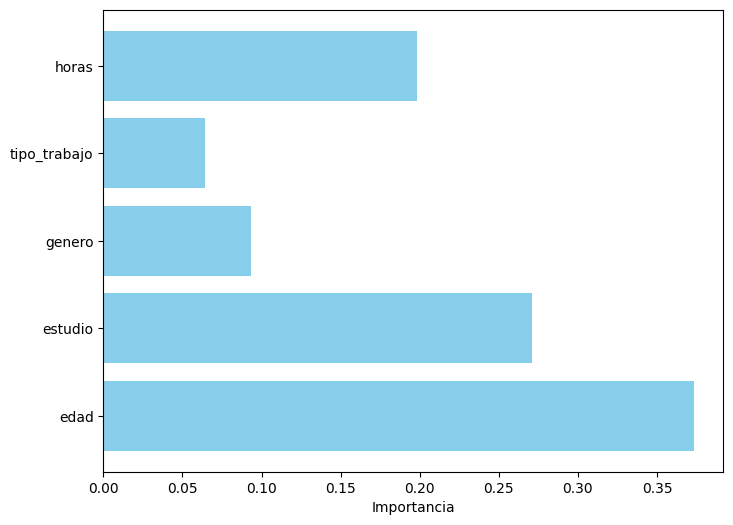

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(nombres, importancia, color='skyblue')
plt.xlabel('Importancia')
plt.show()

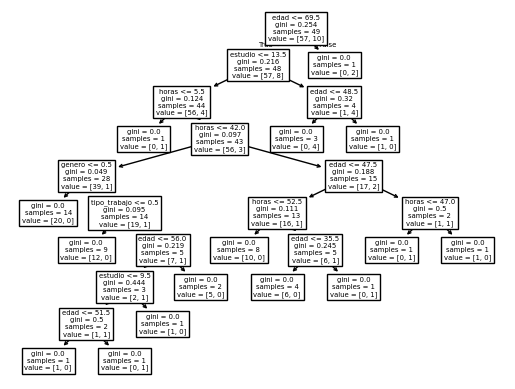

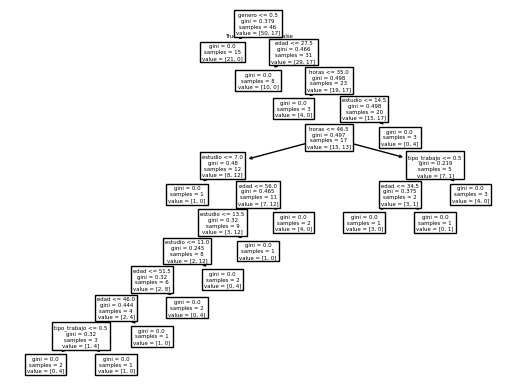

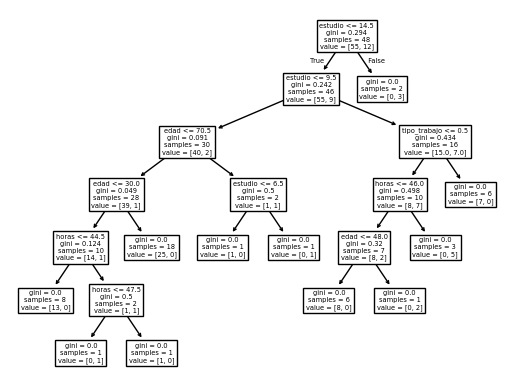

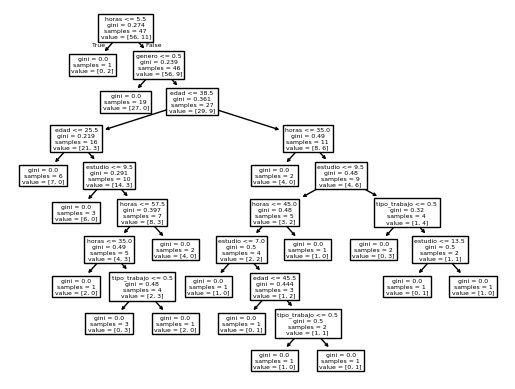

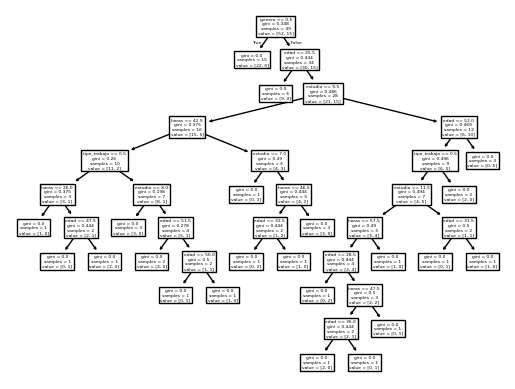

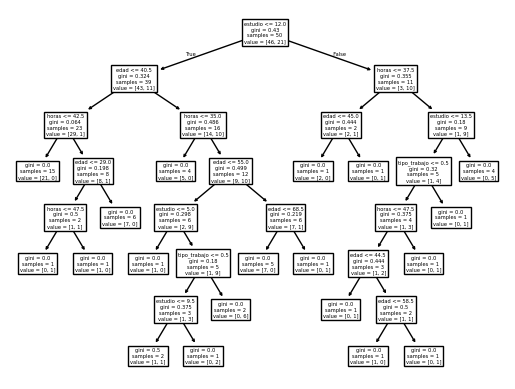

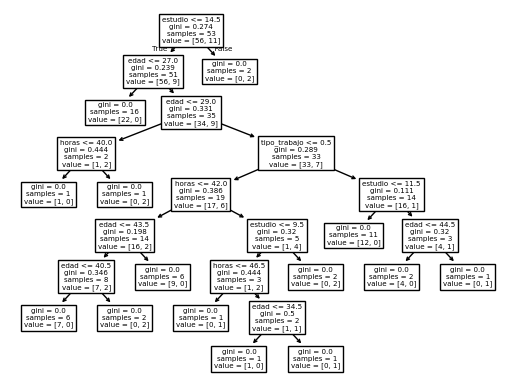

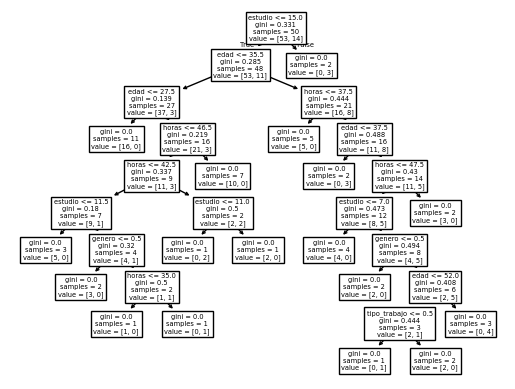

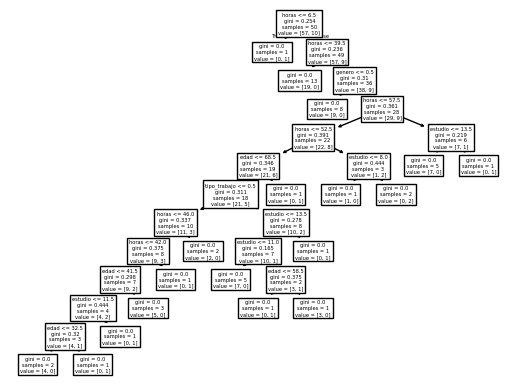

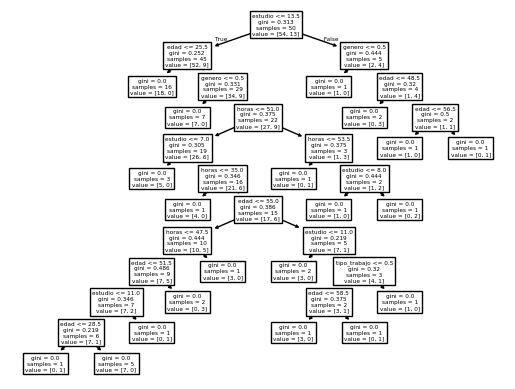

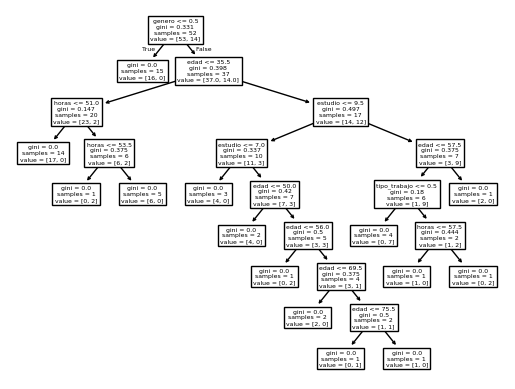

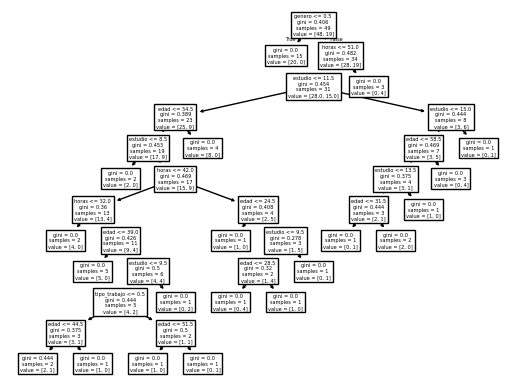

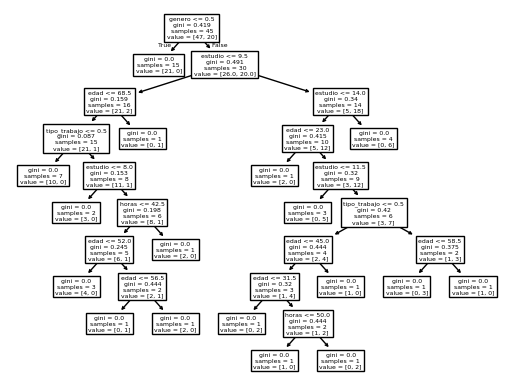

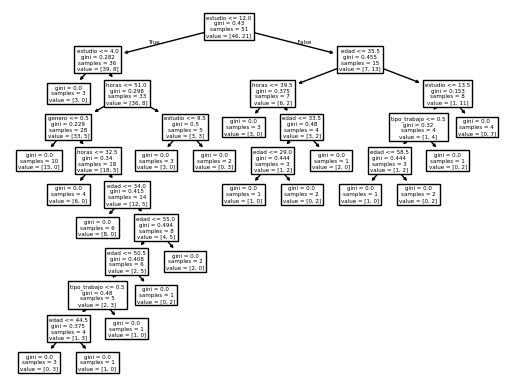

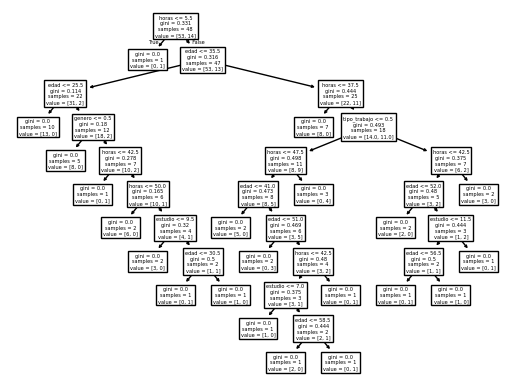

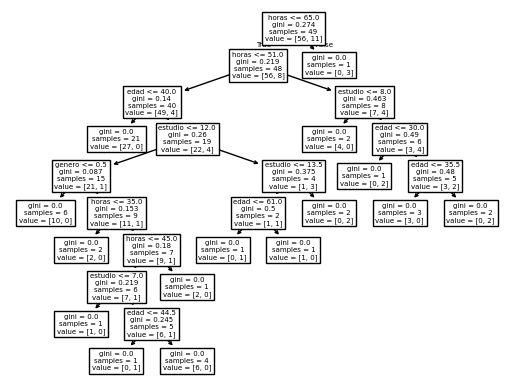

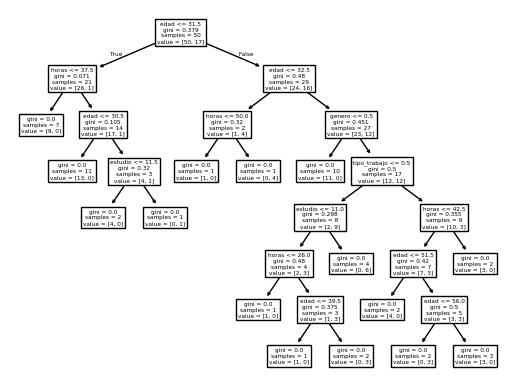

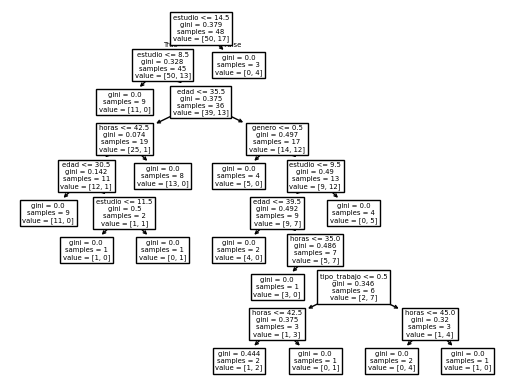

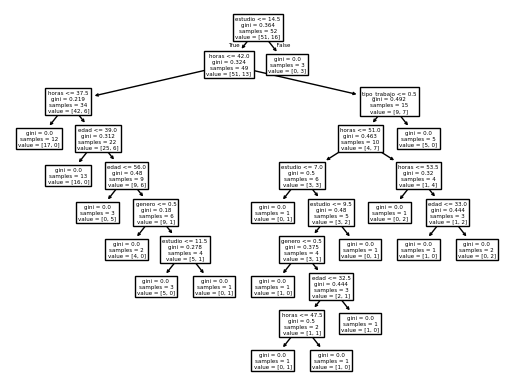

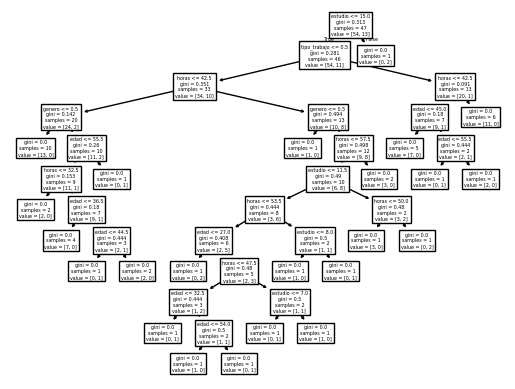

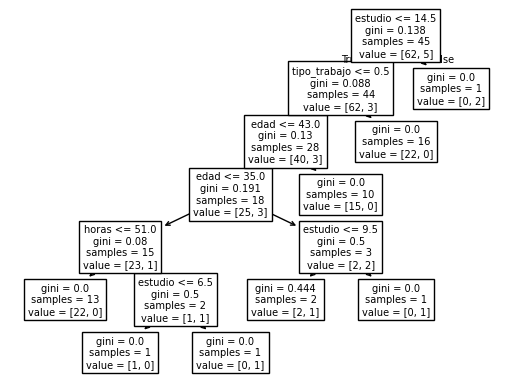

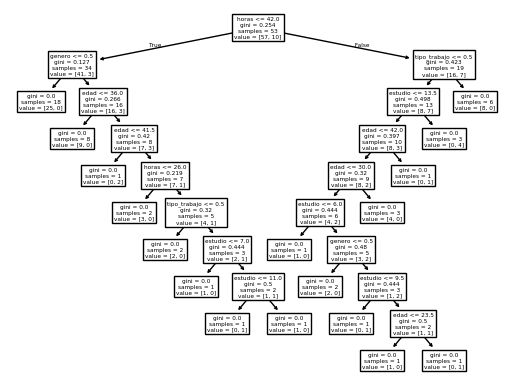

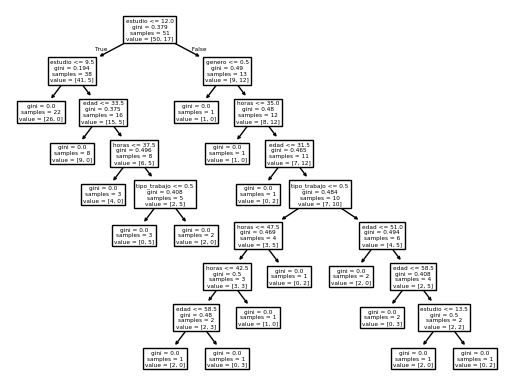

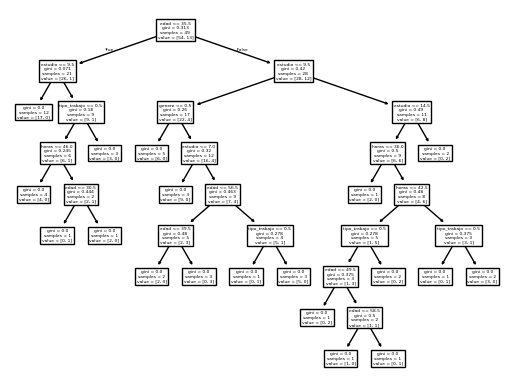

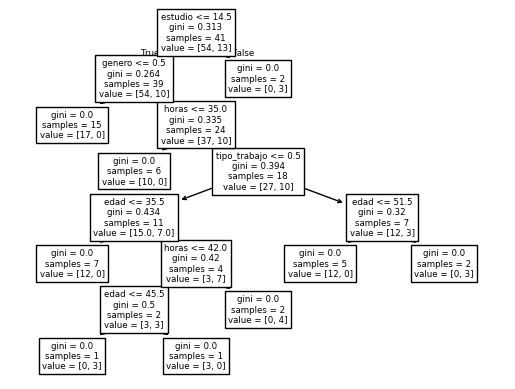

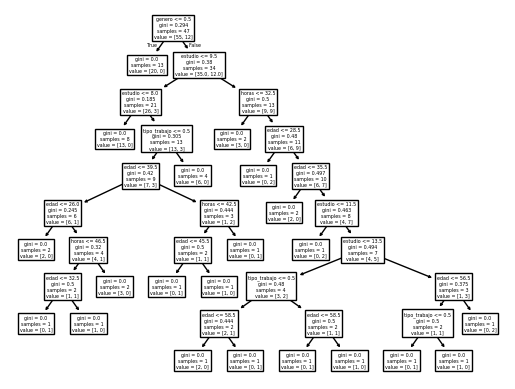

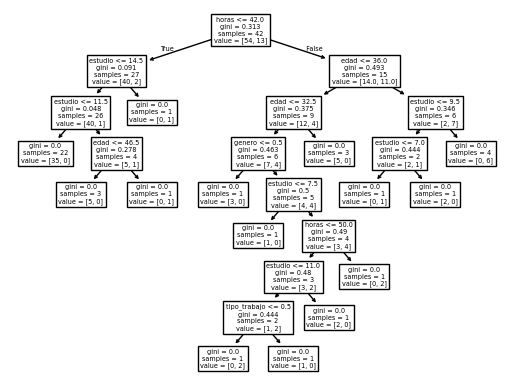

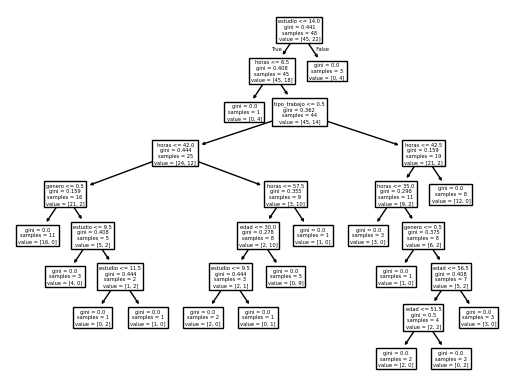

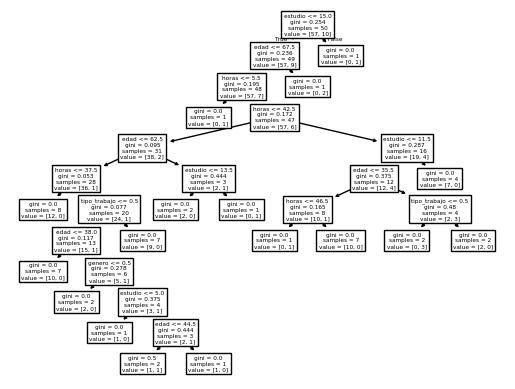

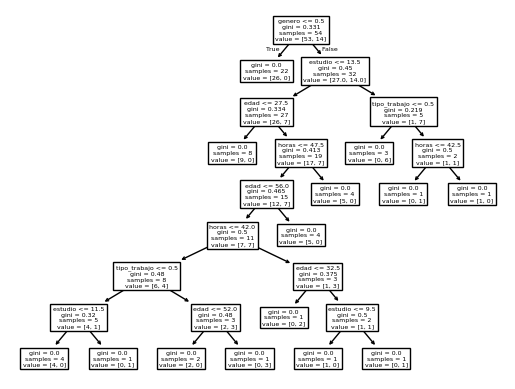

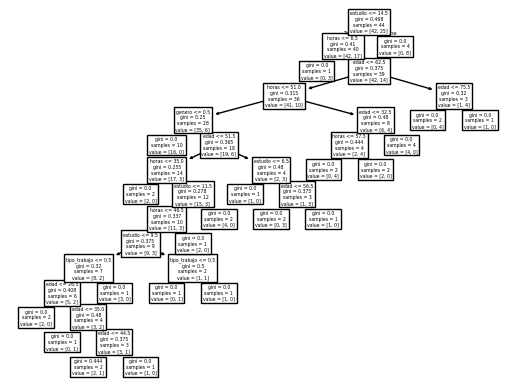

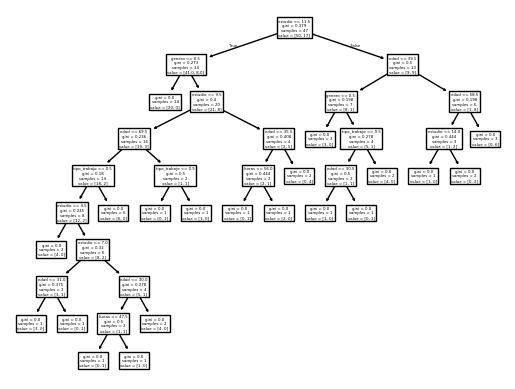

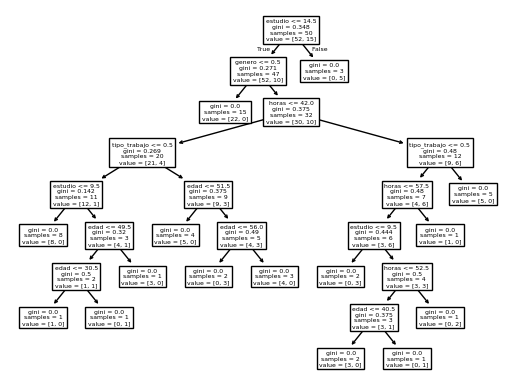

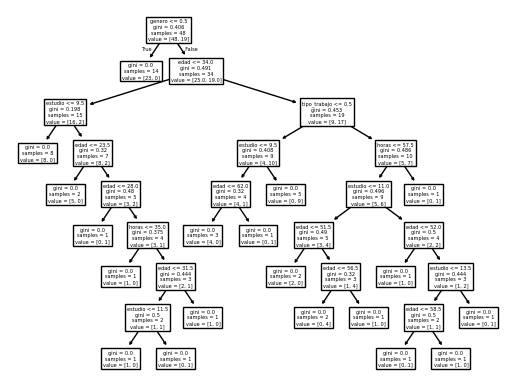

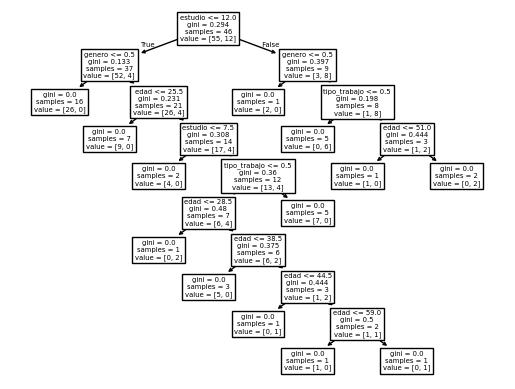

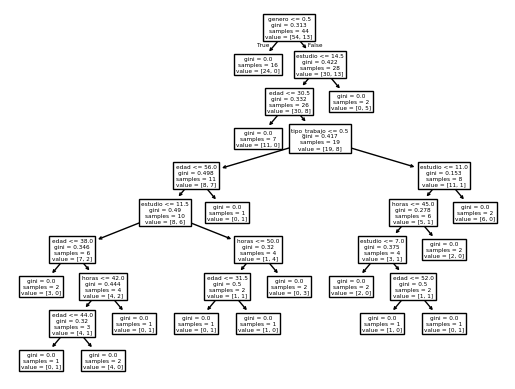

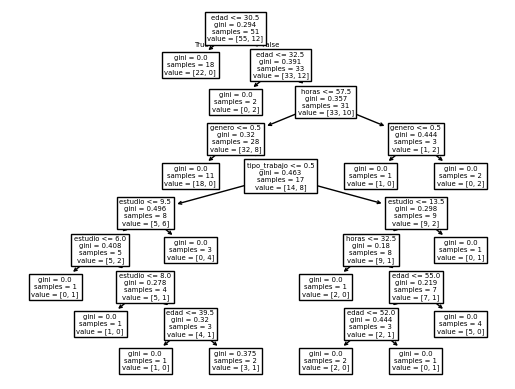

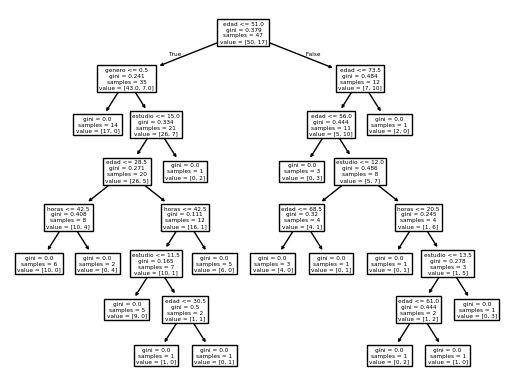

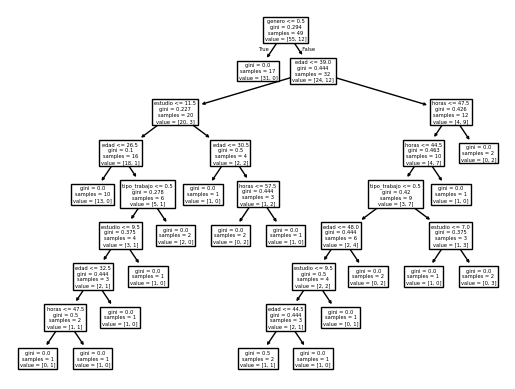

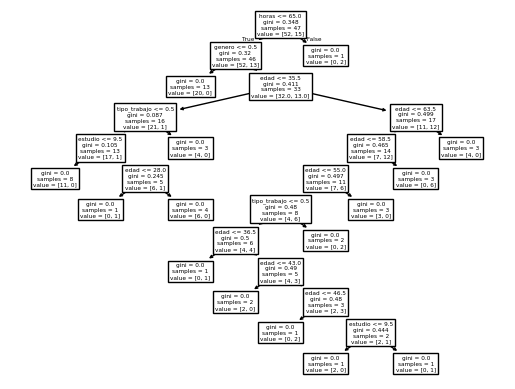

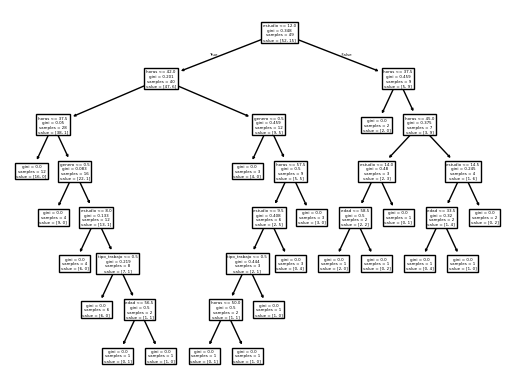

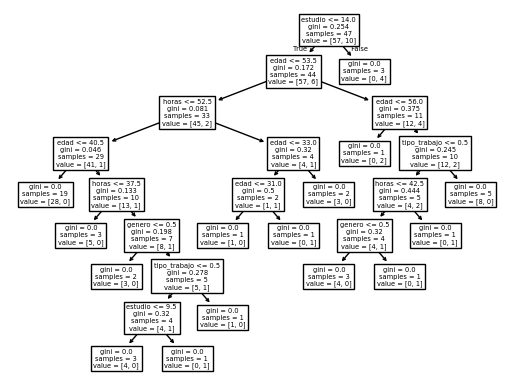

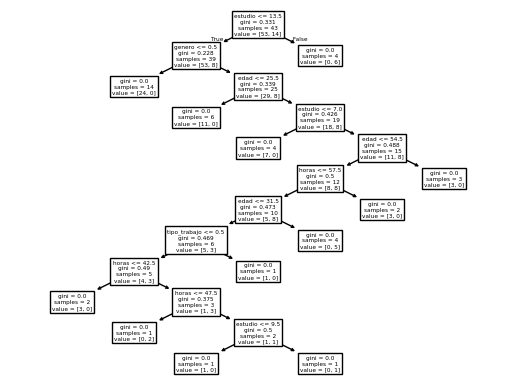

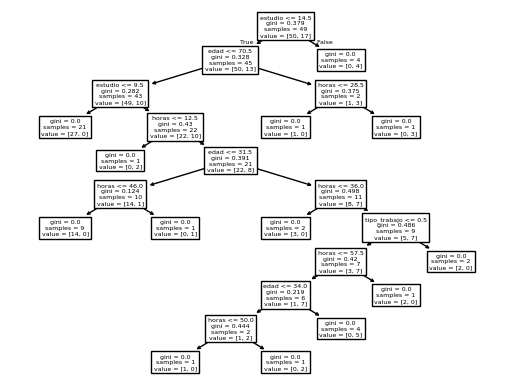

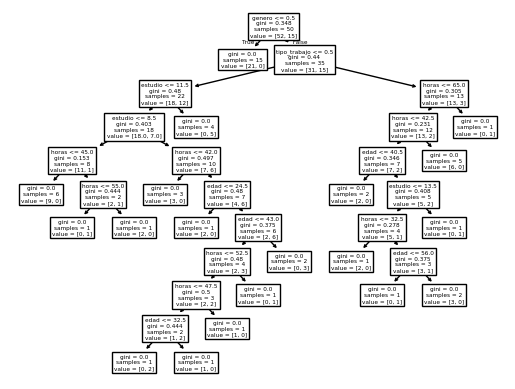

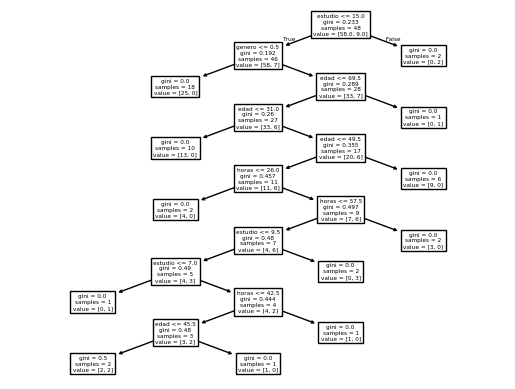

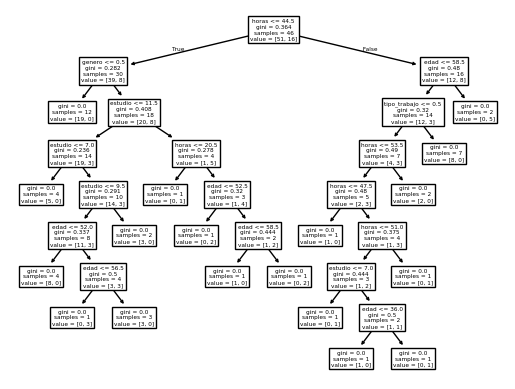

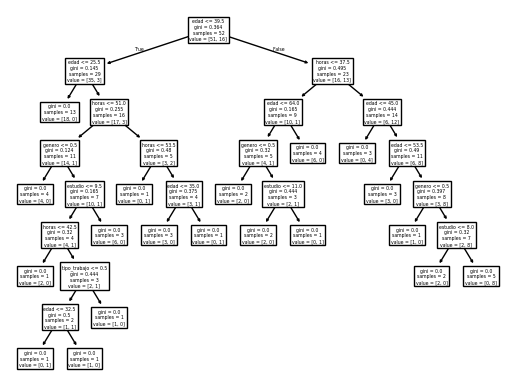

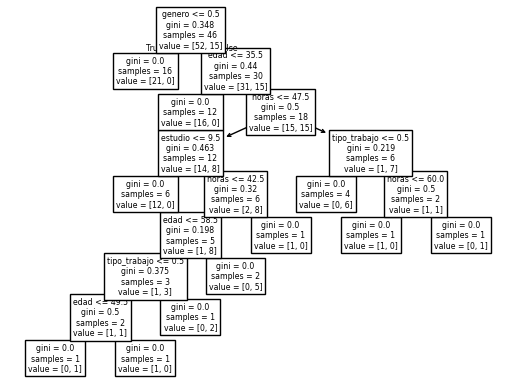

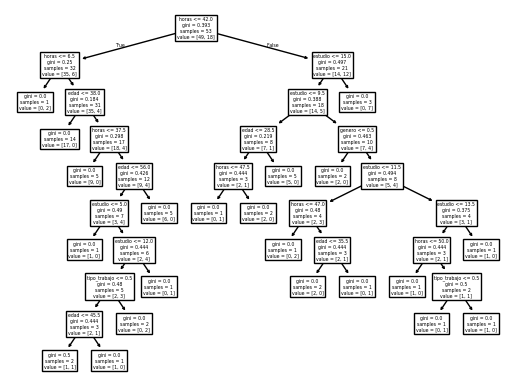

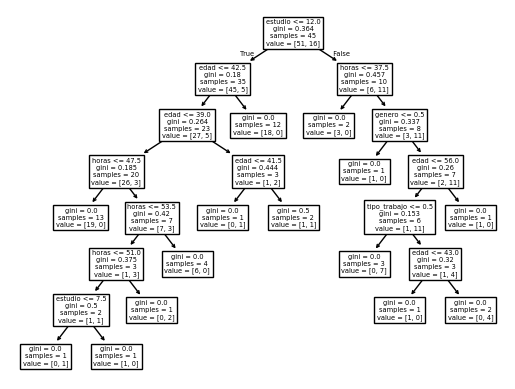

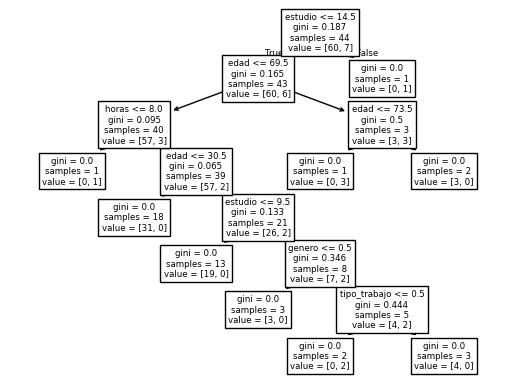

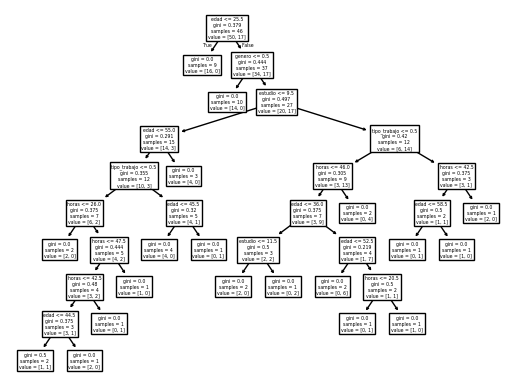

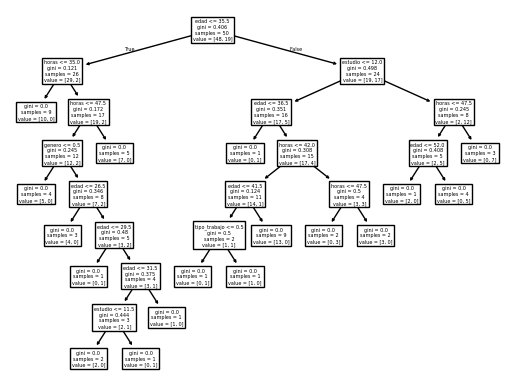

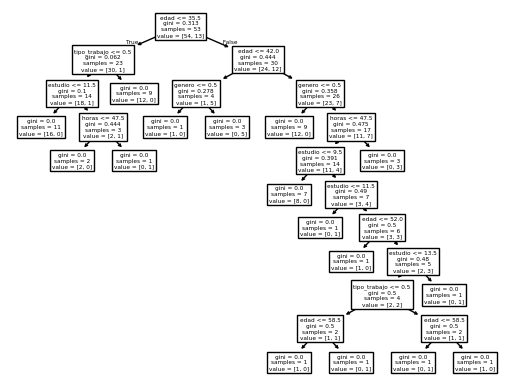

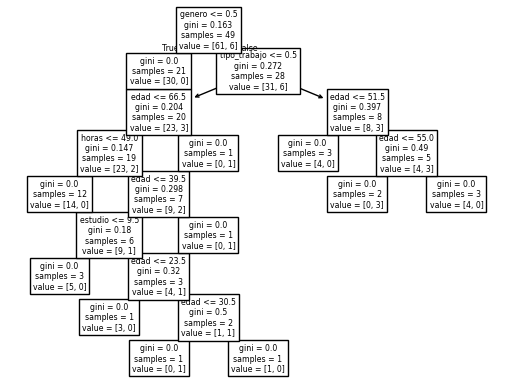

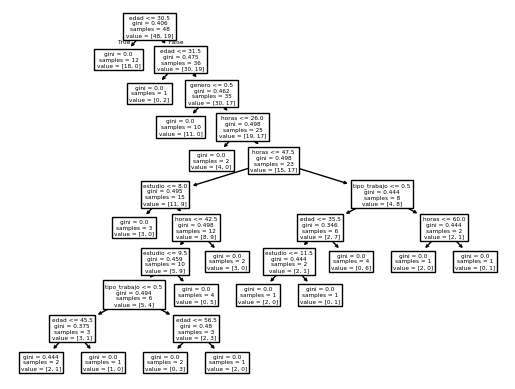

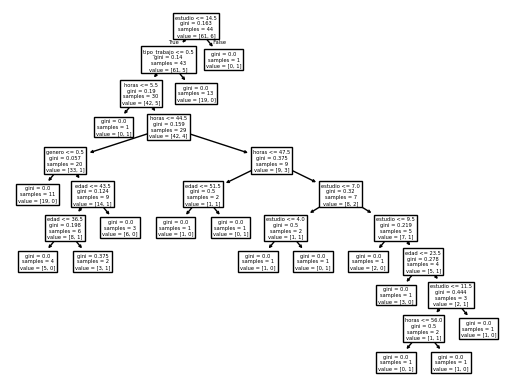

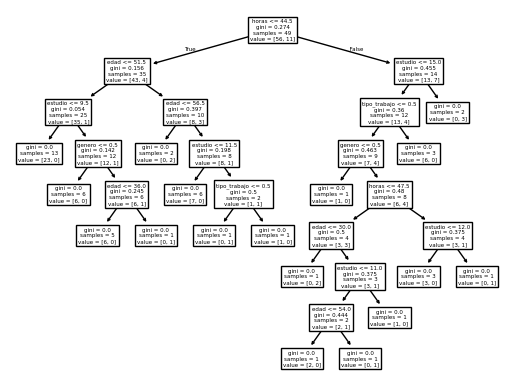

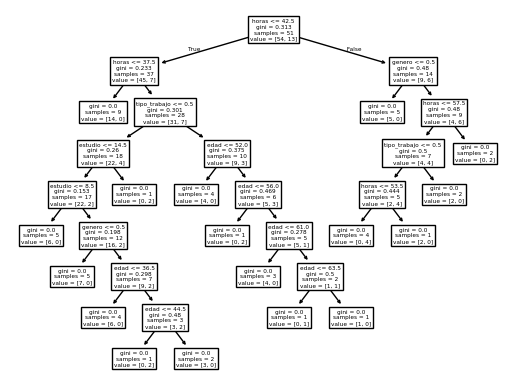

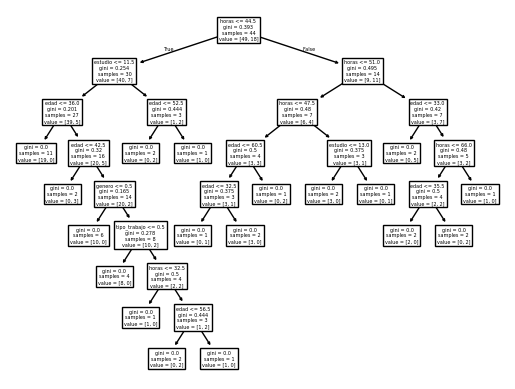

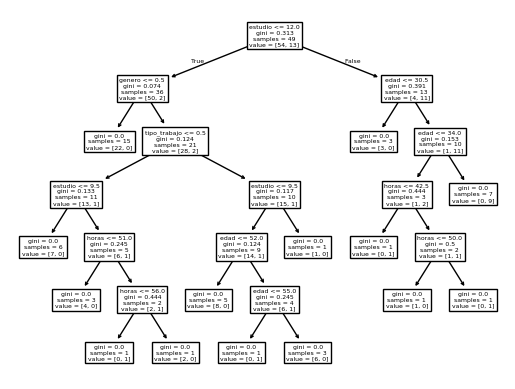

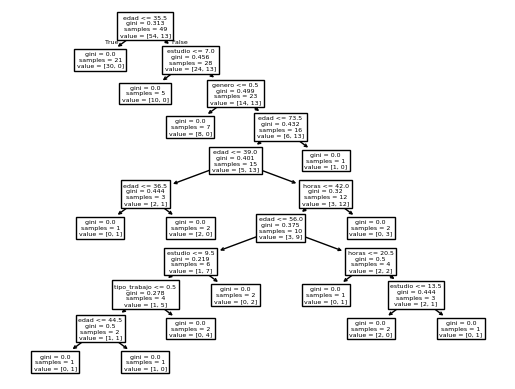

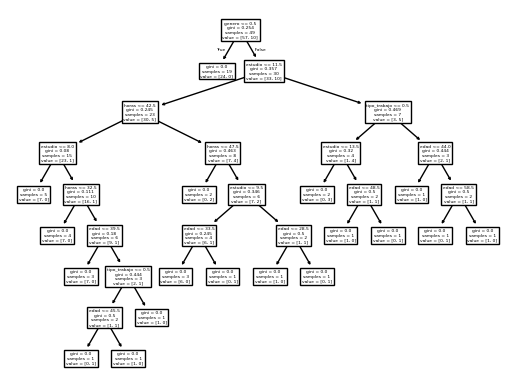

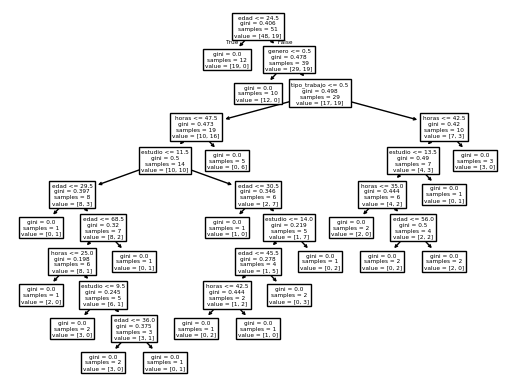

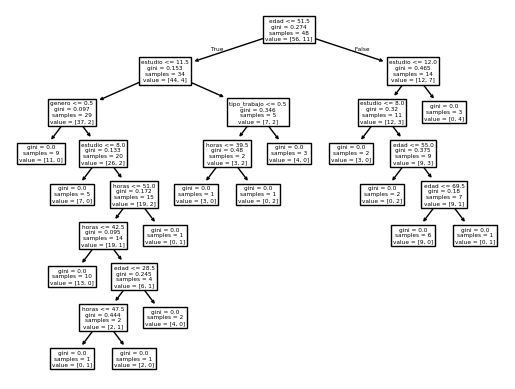

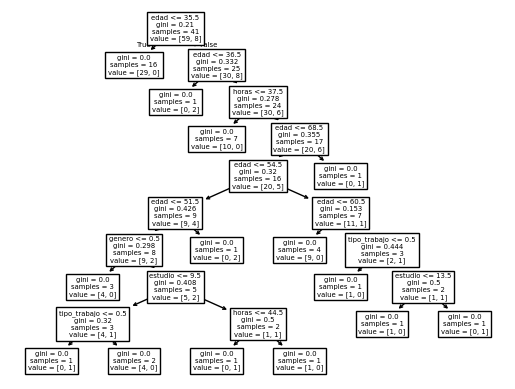

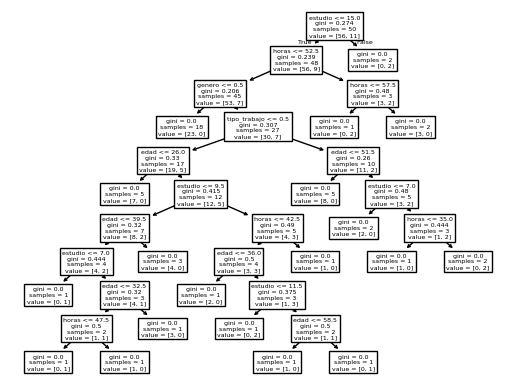

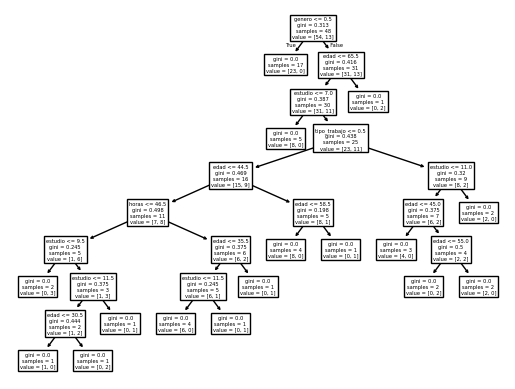

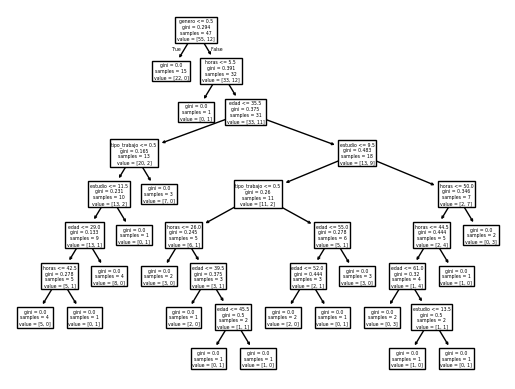

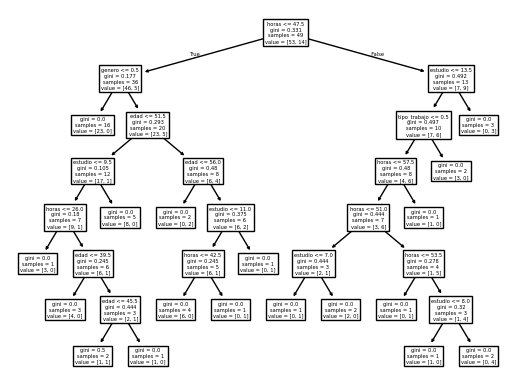

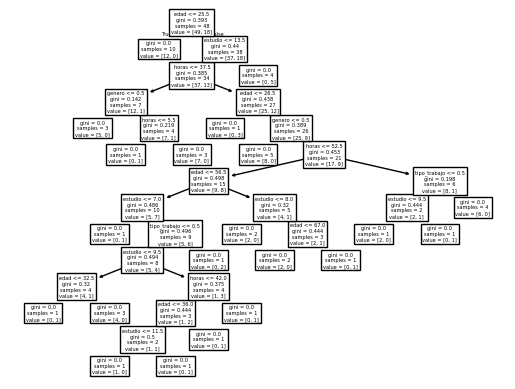

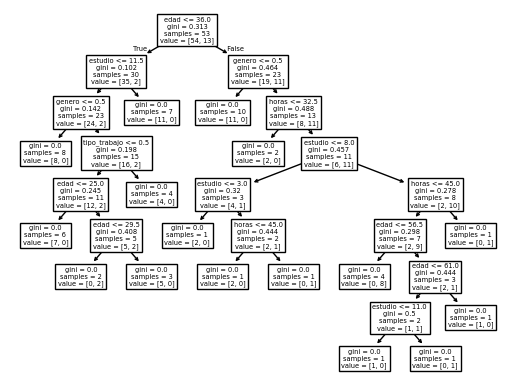

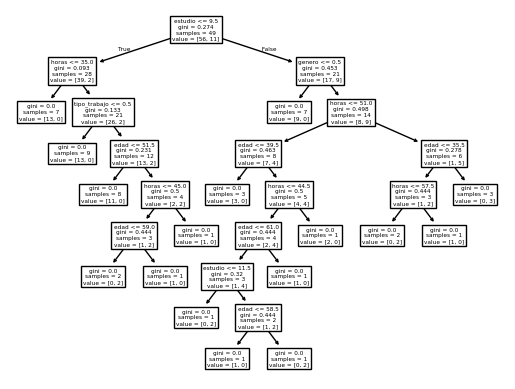

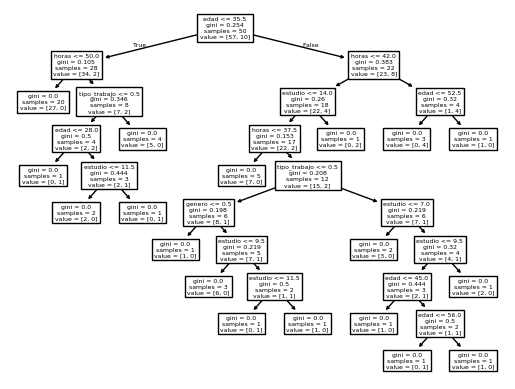

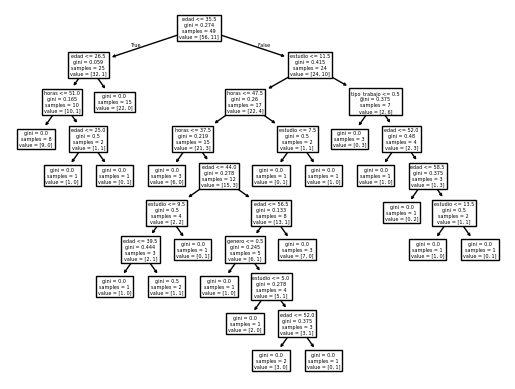

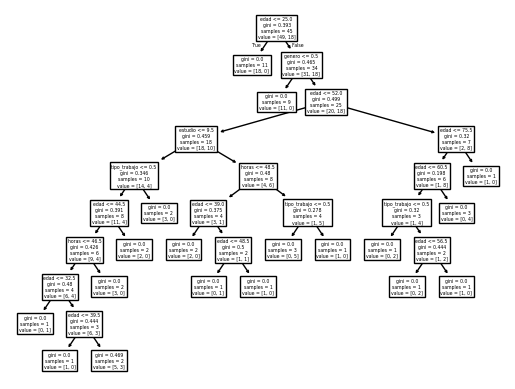

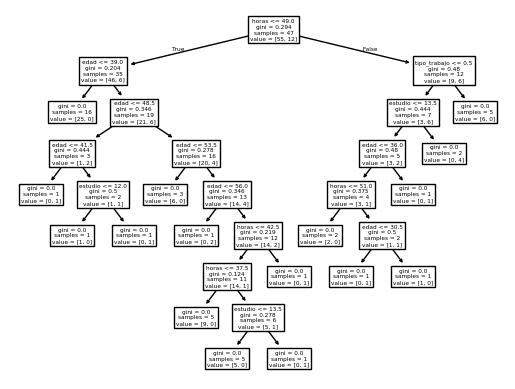

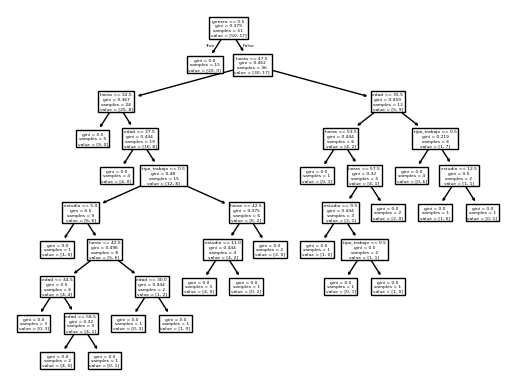

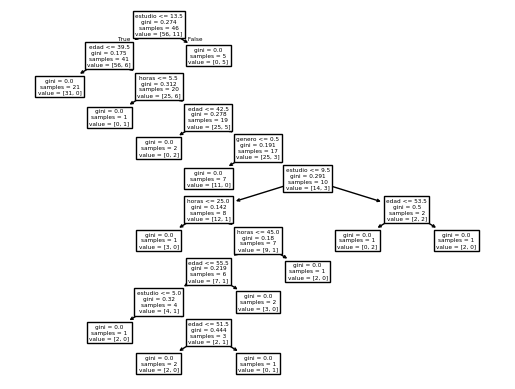

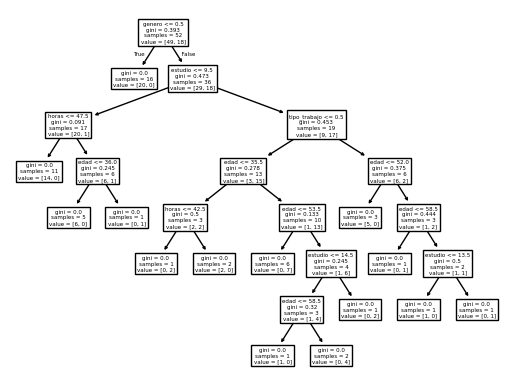

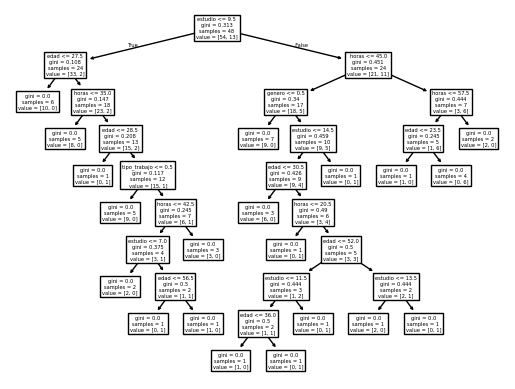

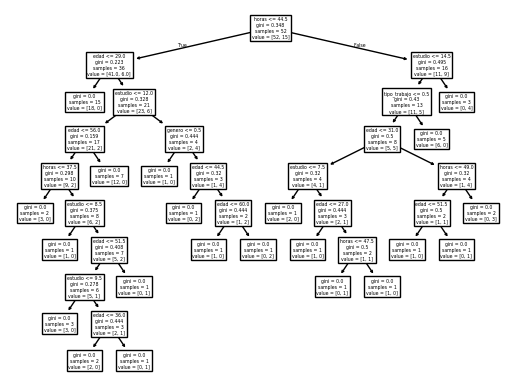

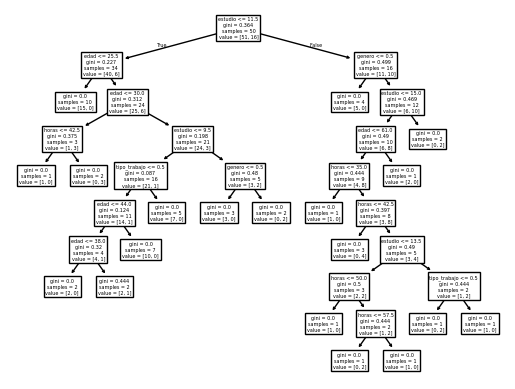

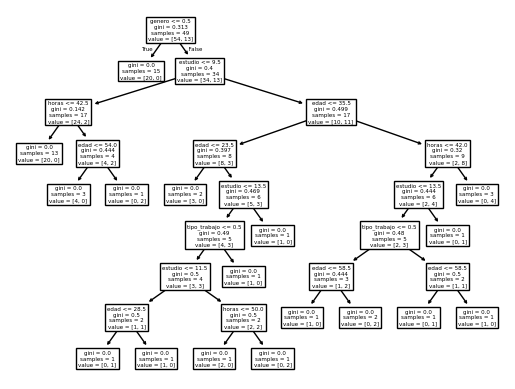

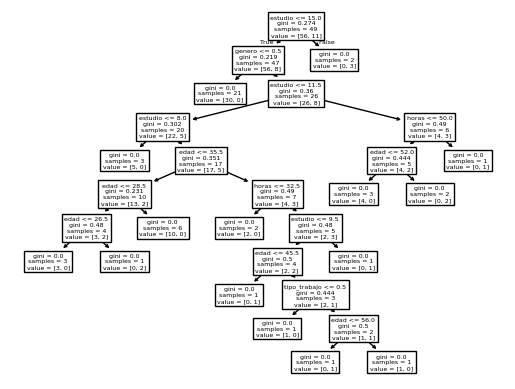

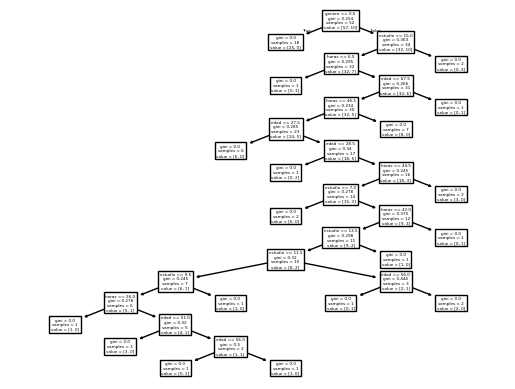

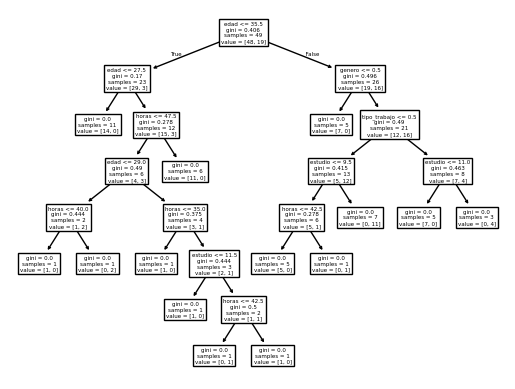

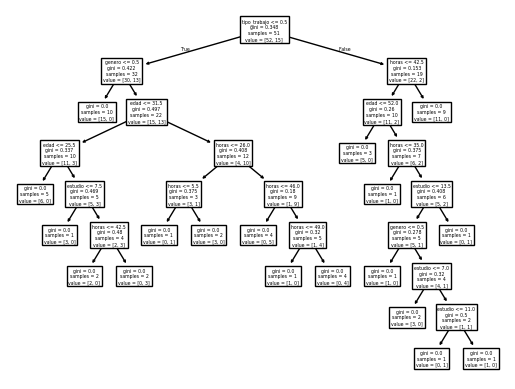

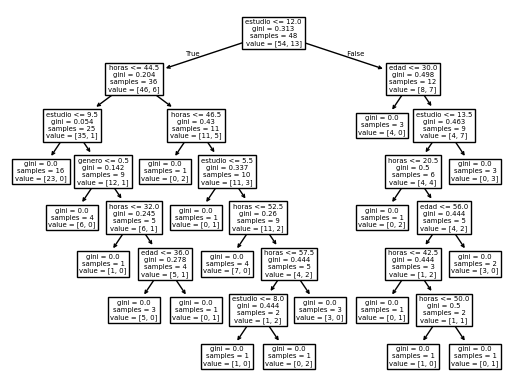

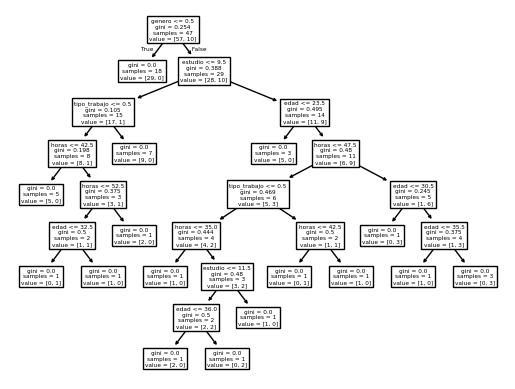

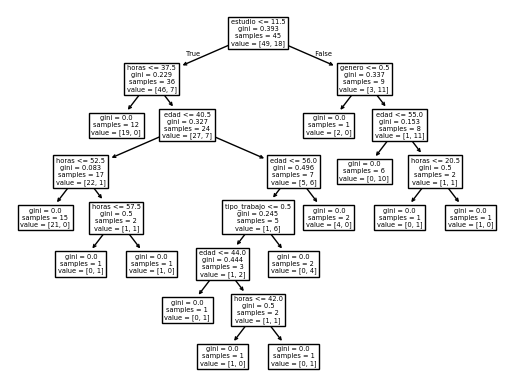

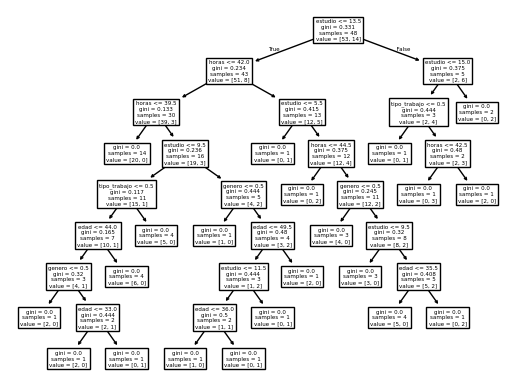

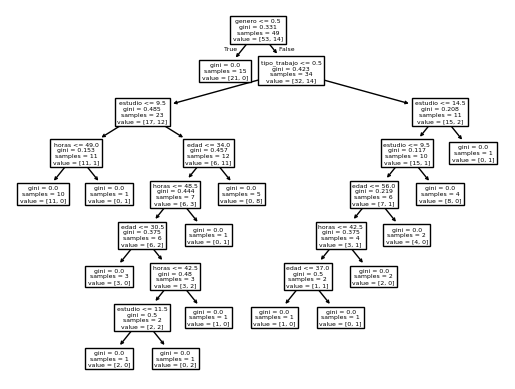

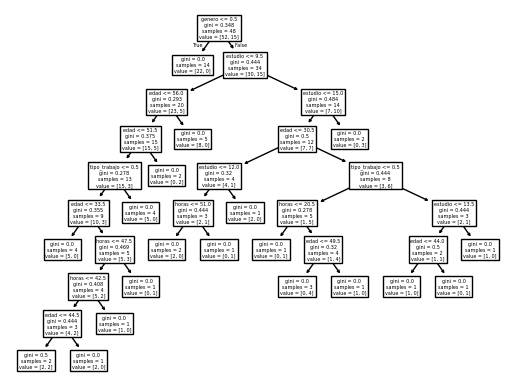

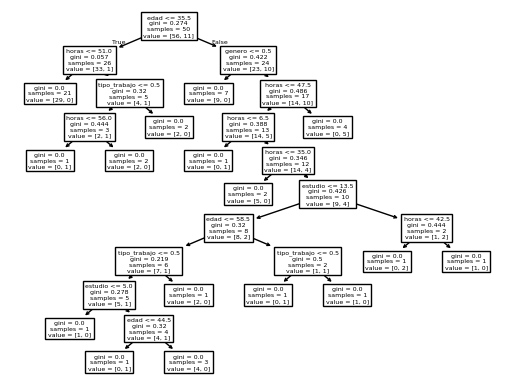

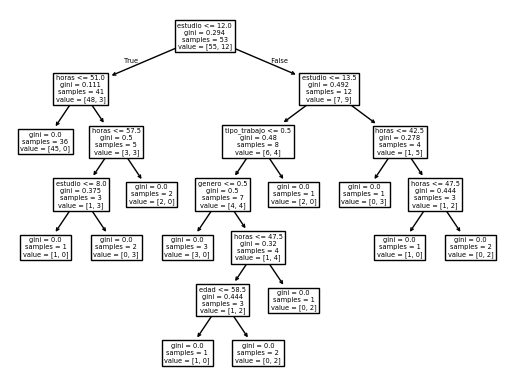

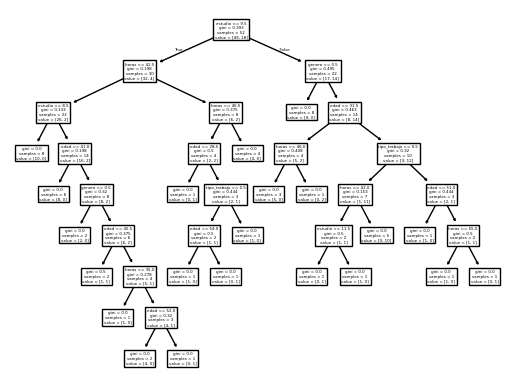

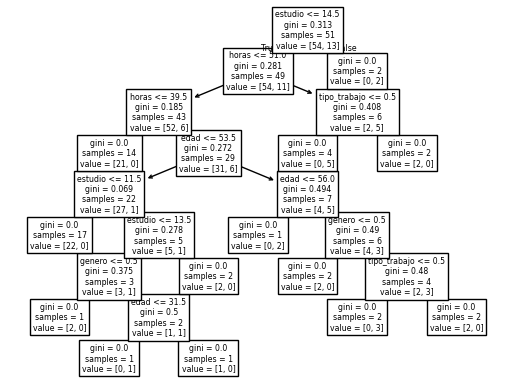

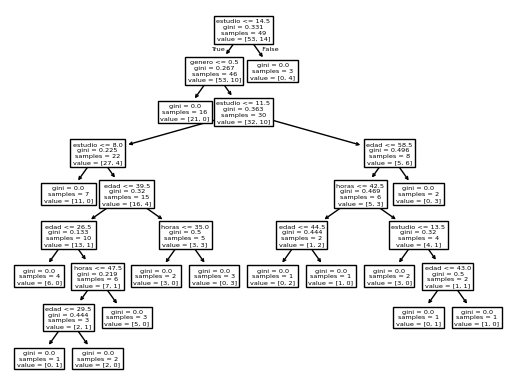

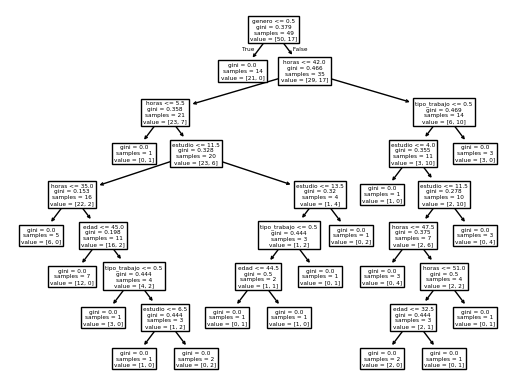

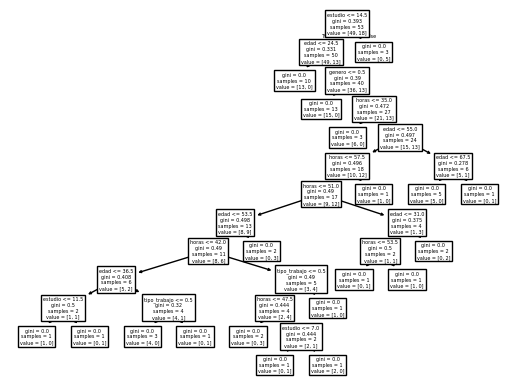

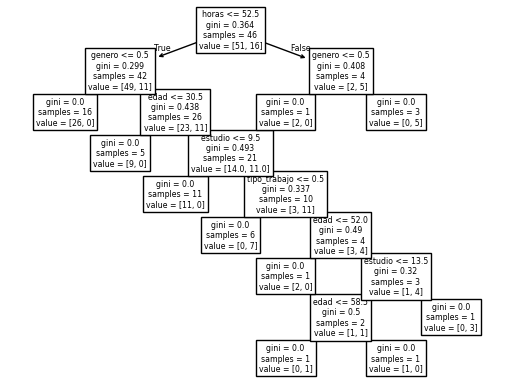

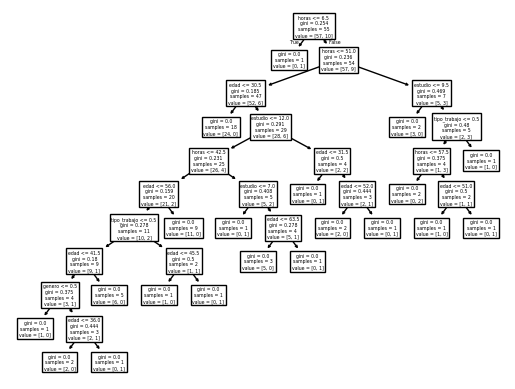

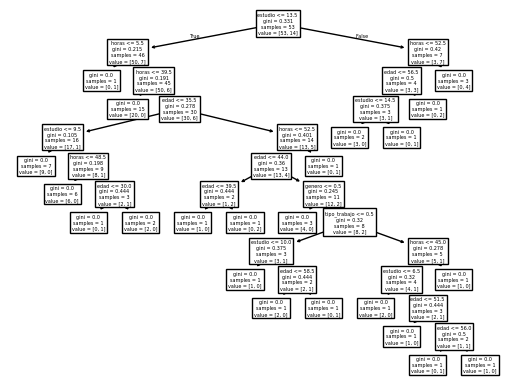

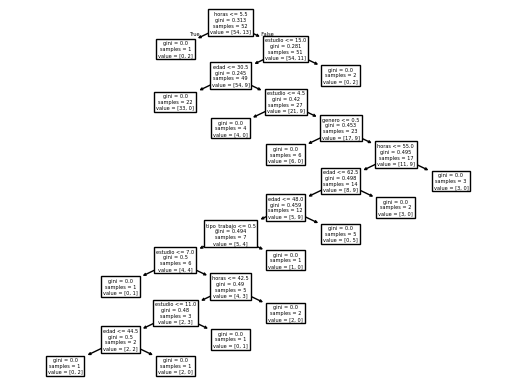

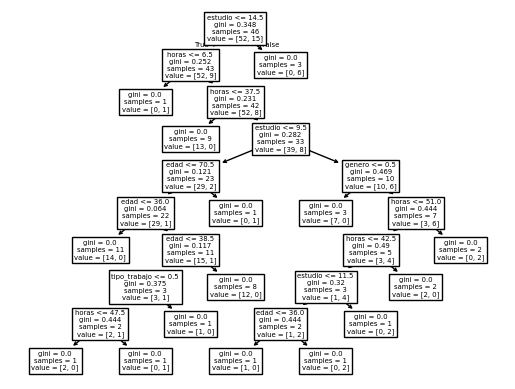

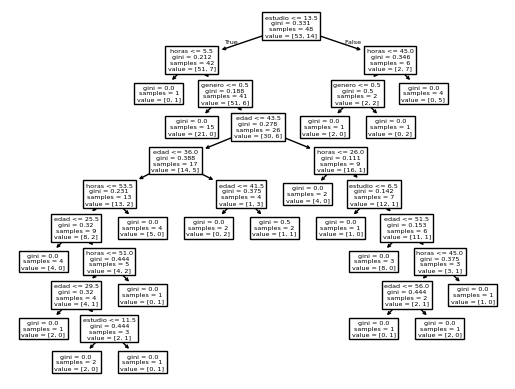

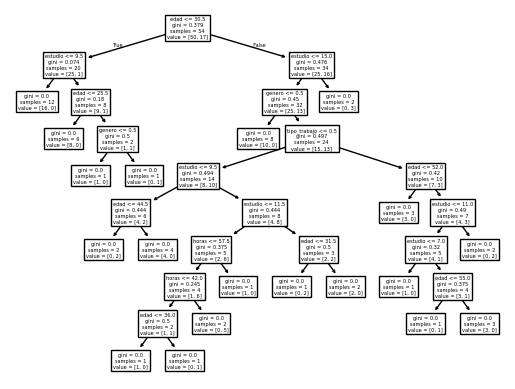

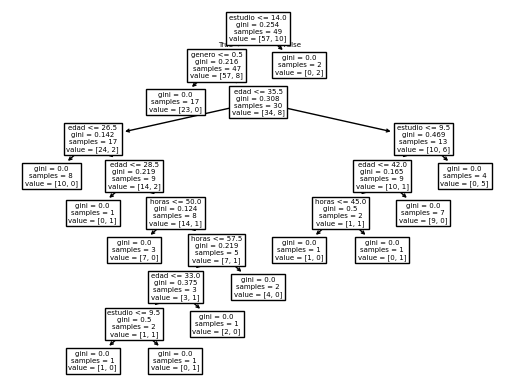

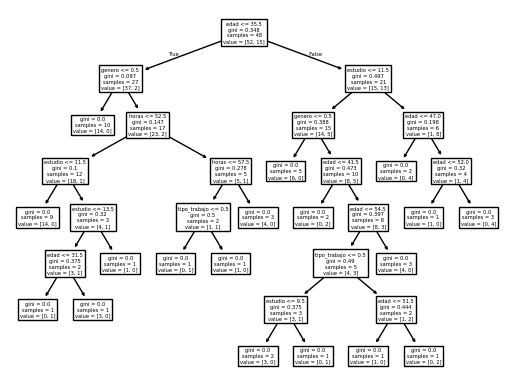

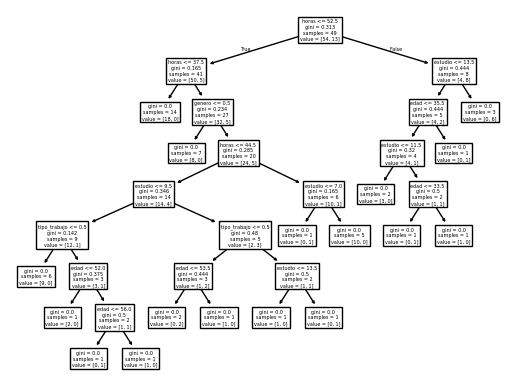

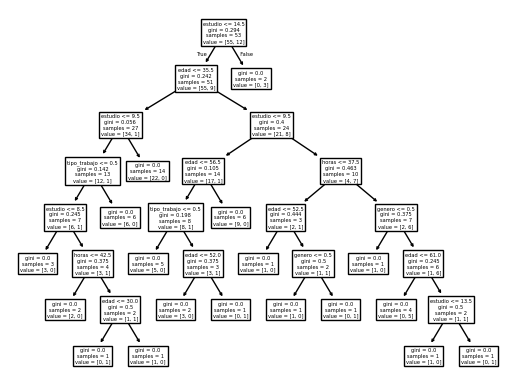

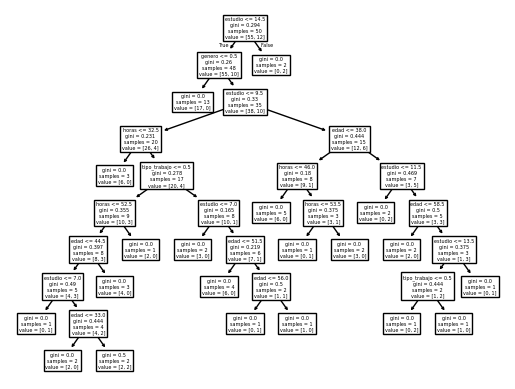

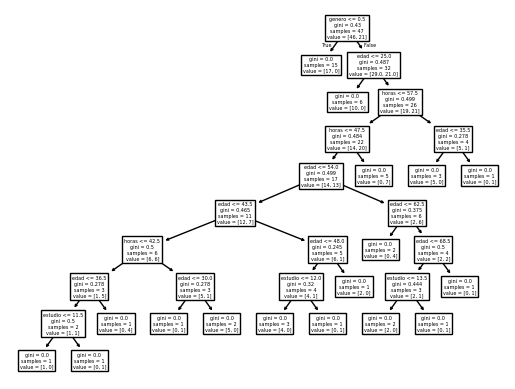

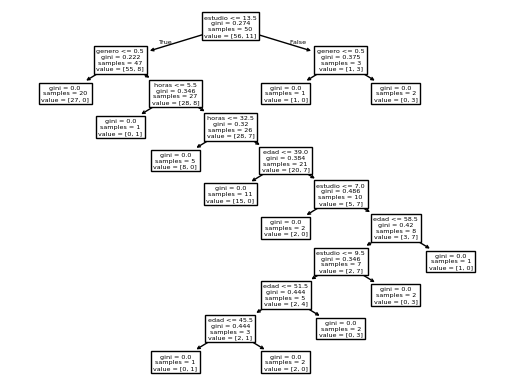

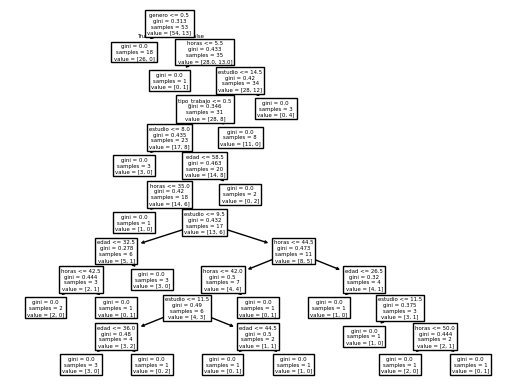

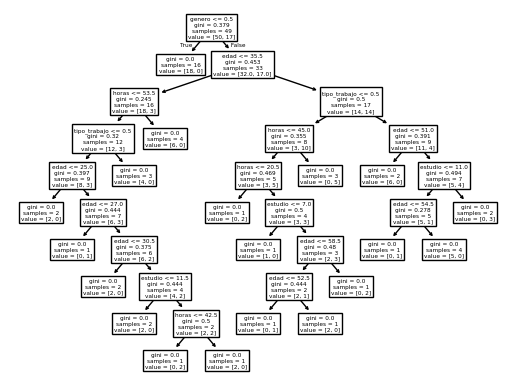

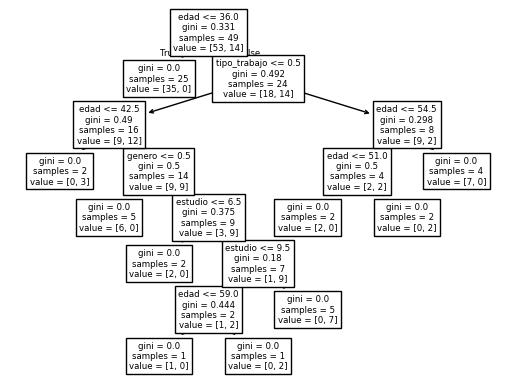

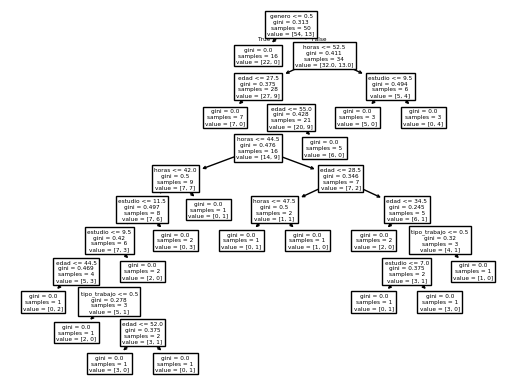

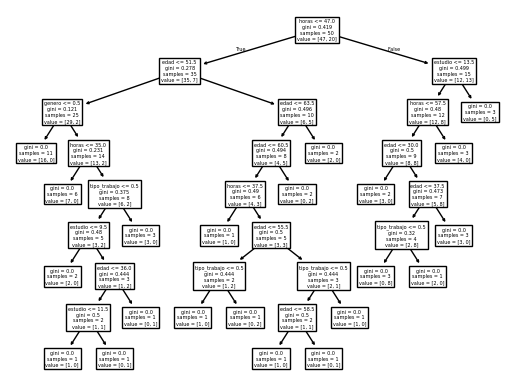

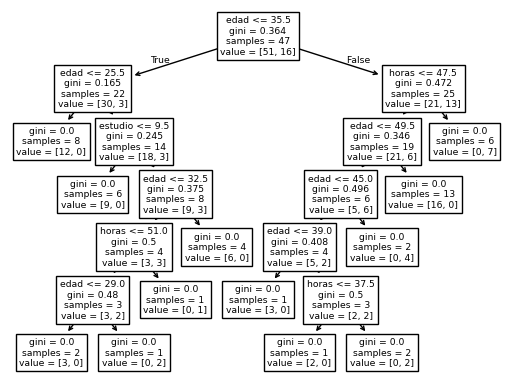

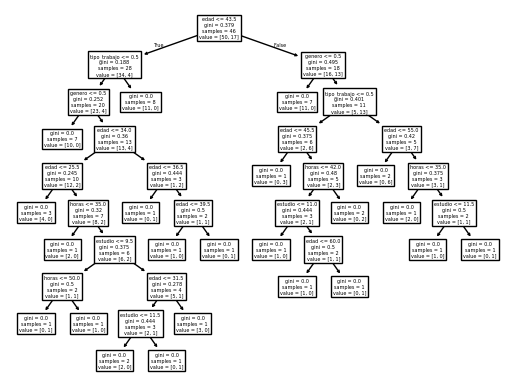

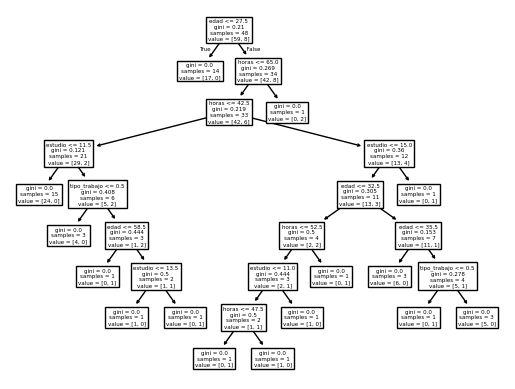

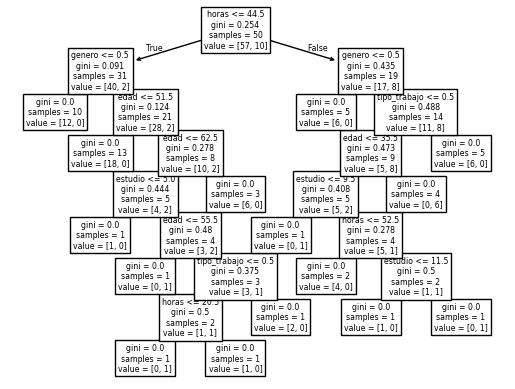

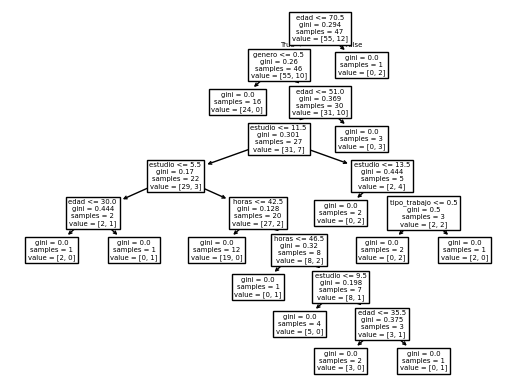

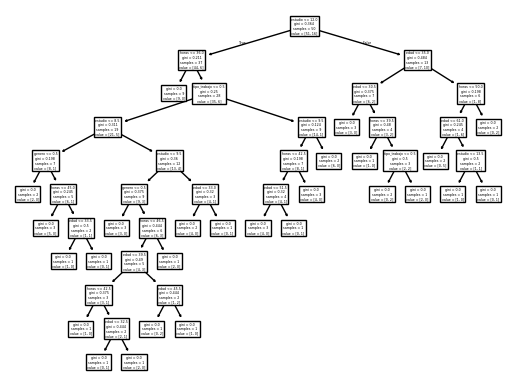

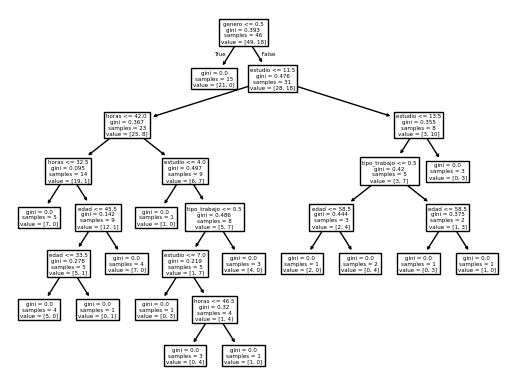

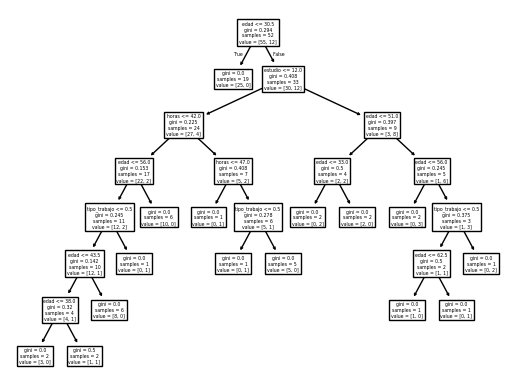

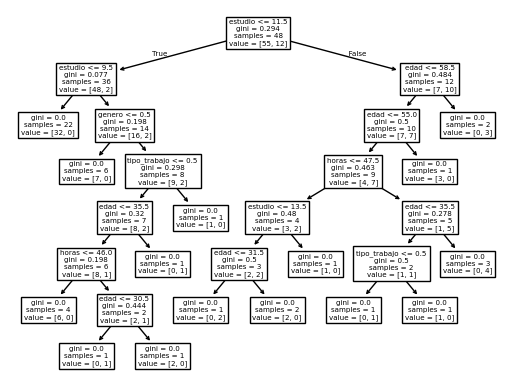

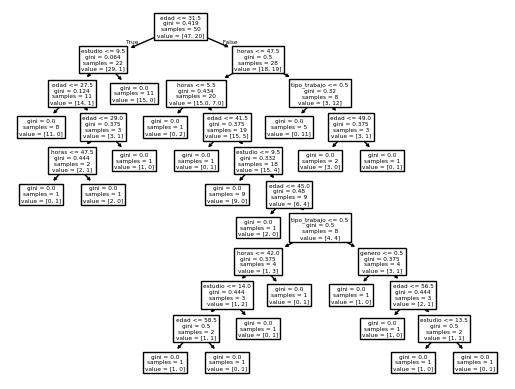

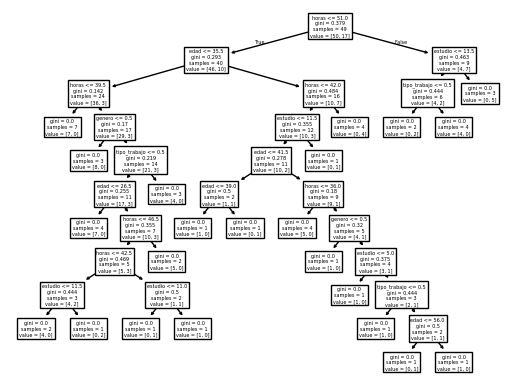

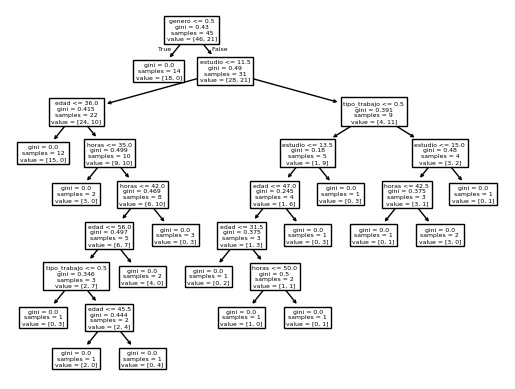

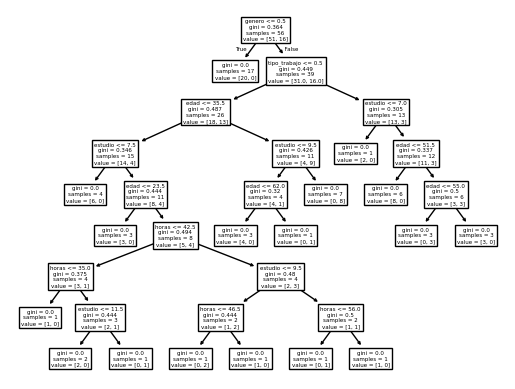

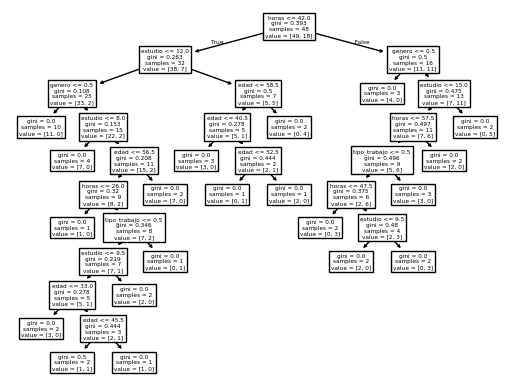

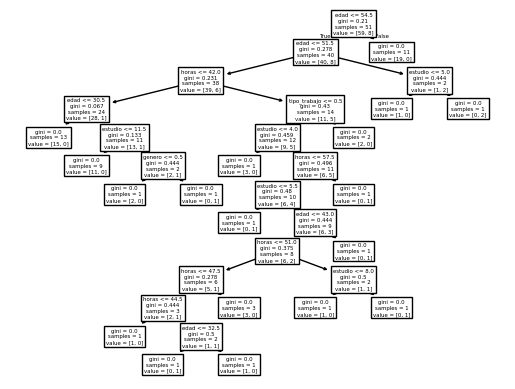

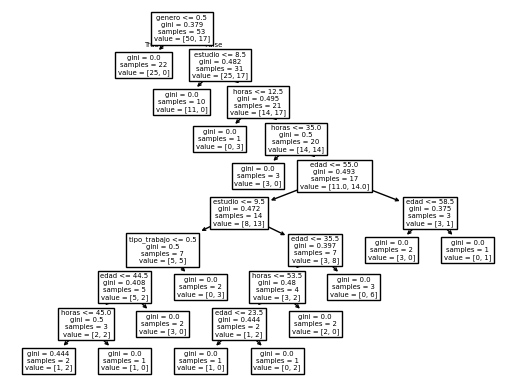

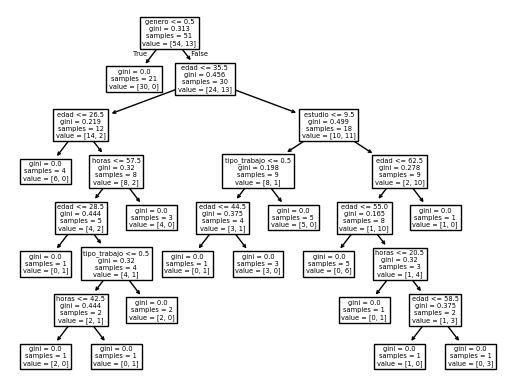

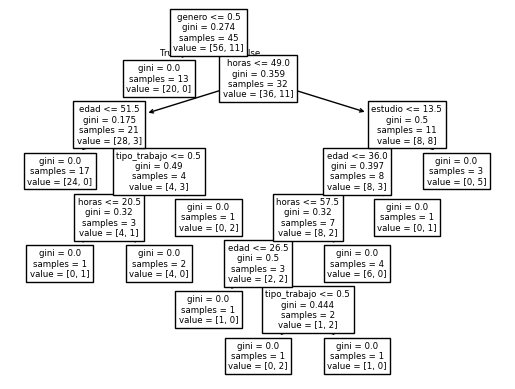

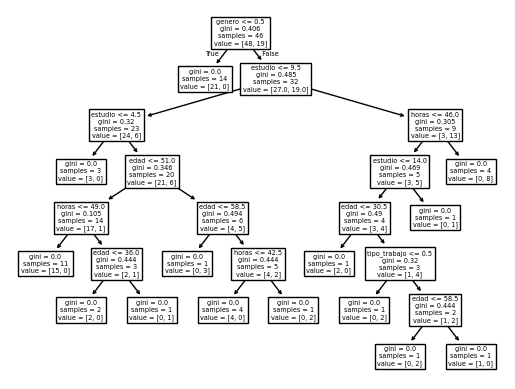

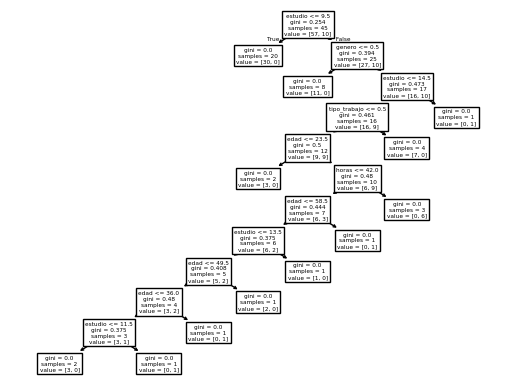

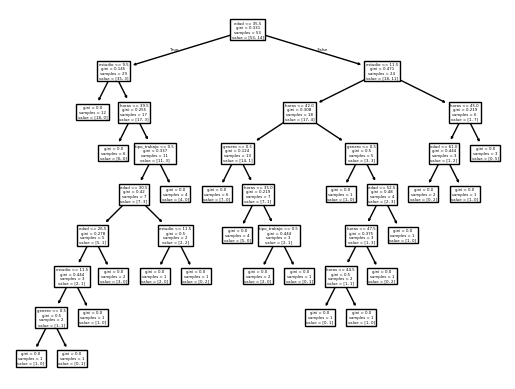

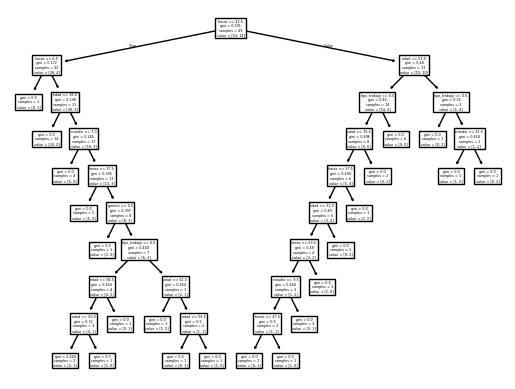

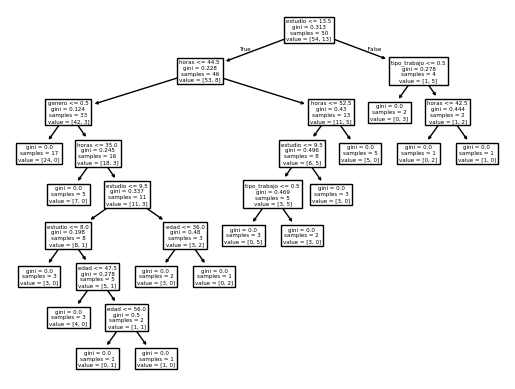

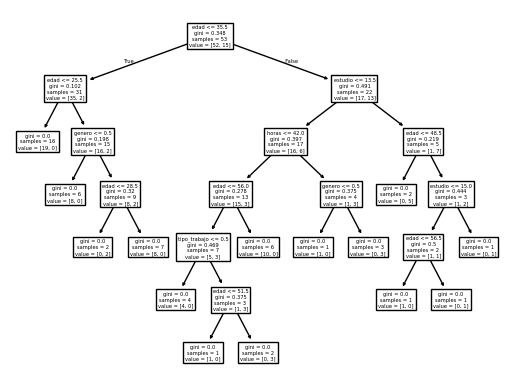

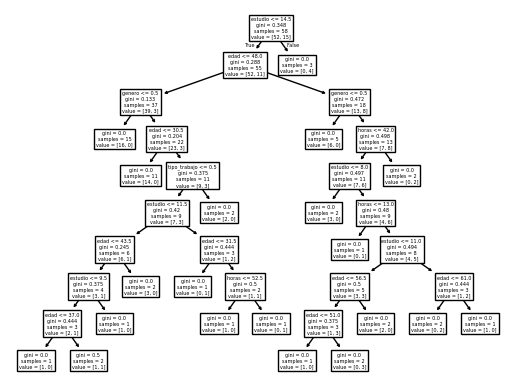

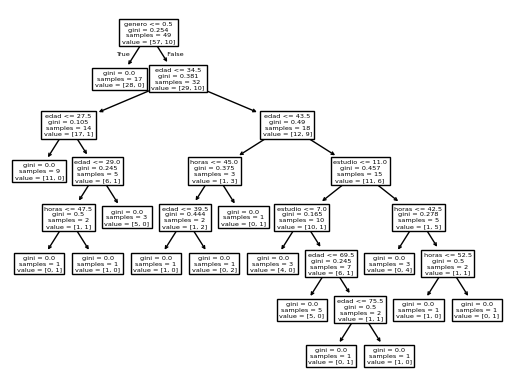

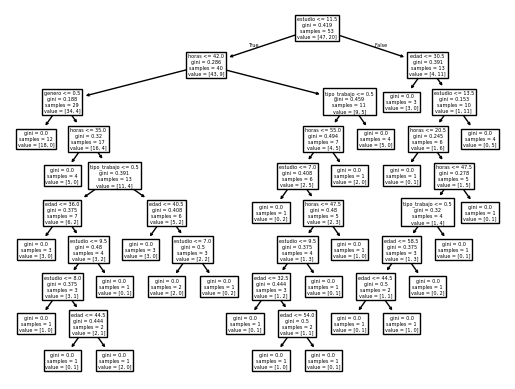

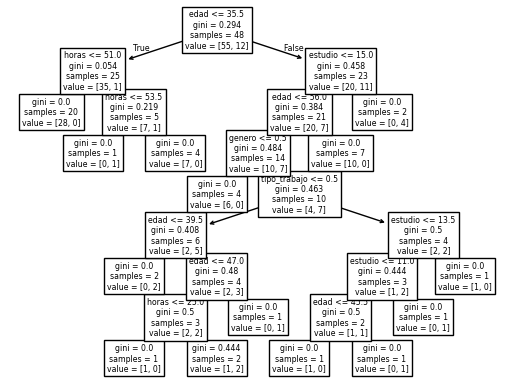

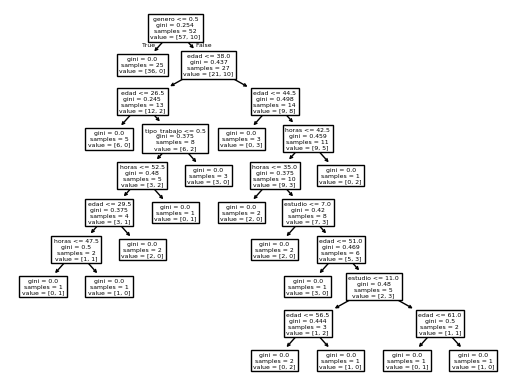

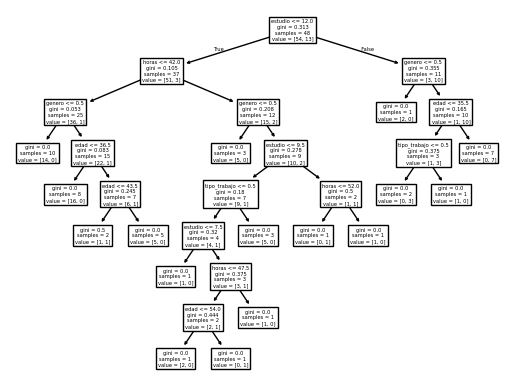

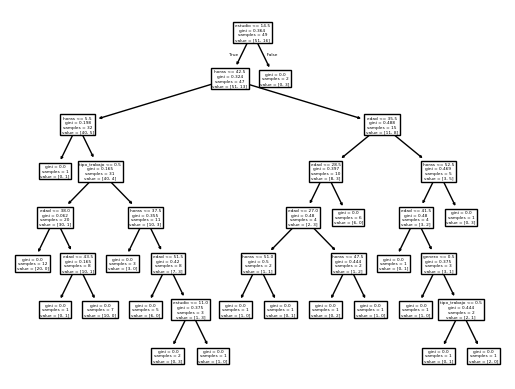

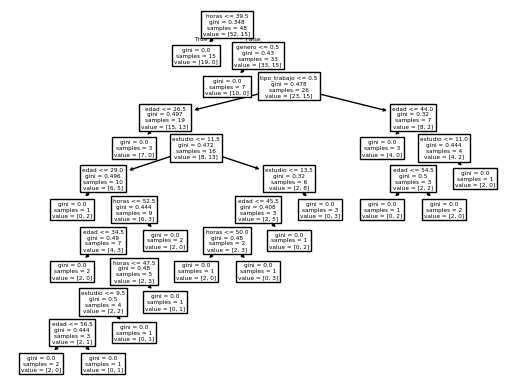

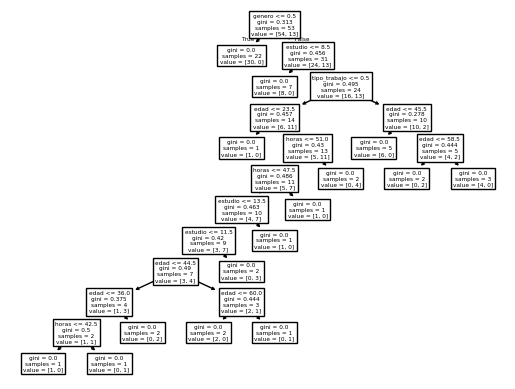

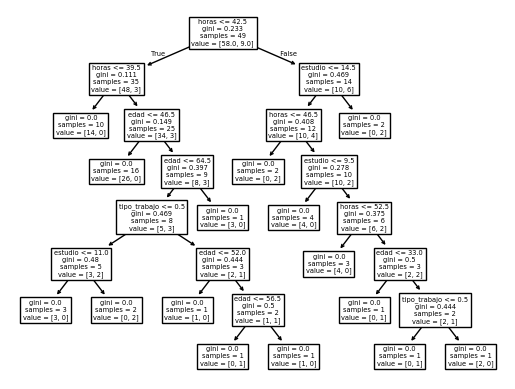

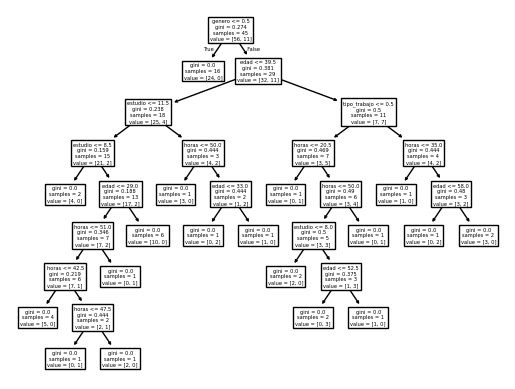

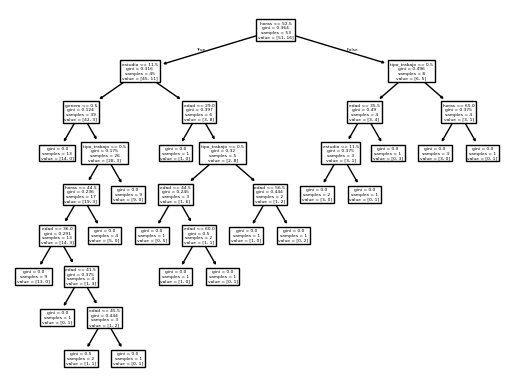

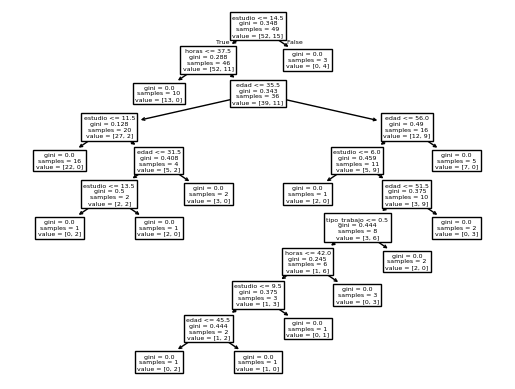

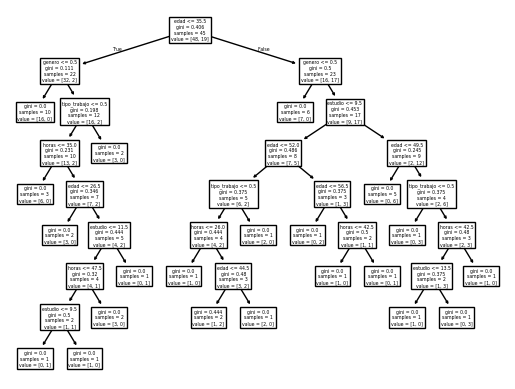

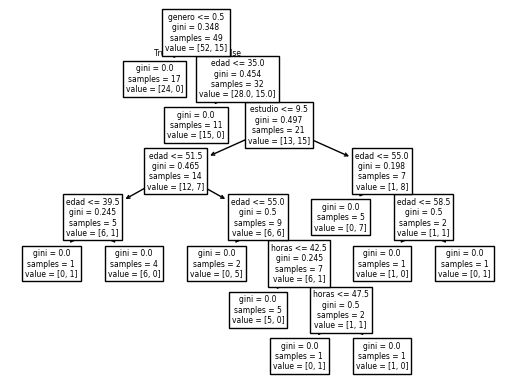

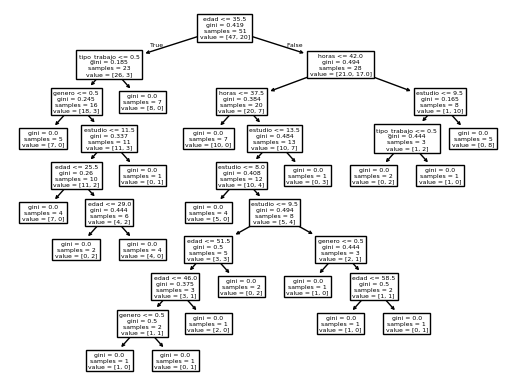

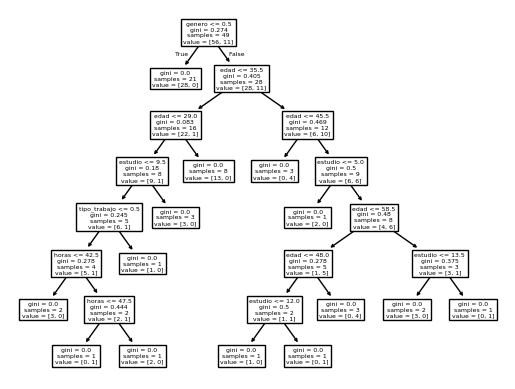

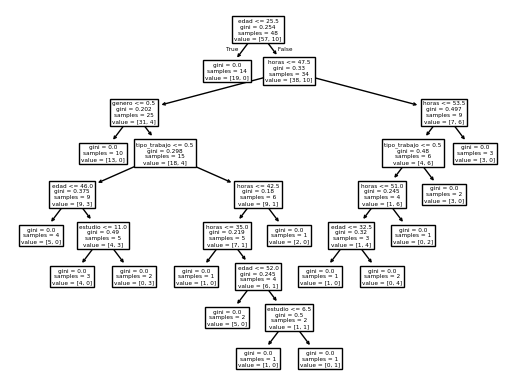

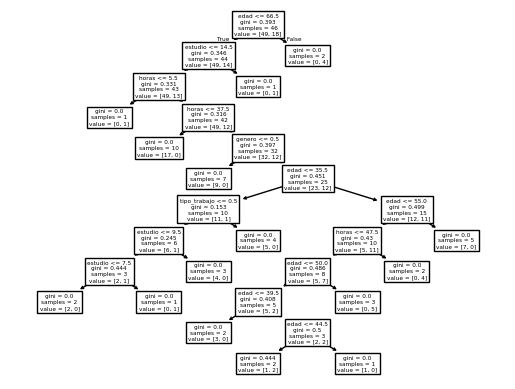

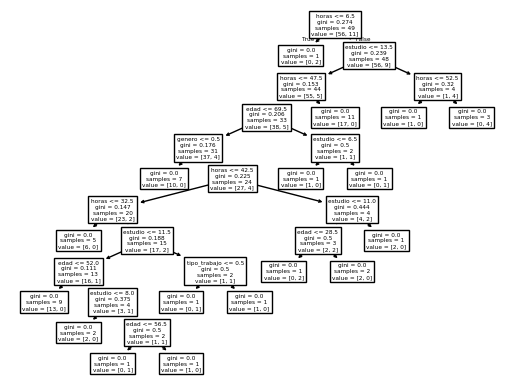

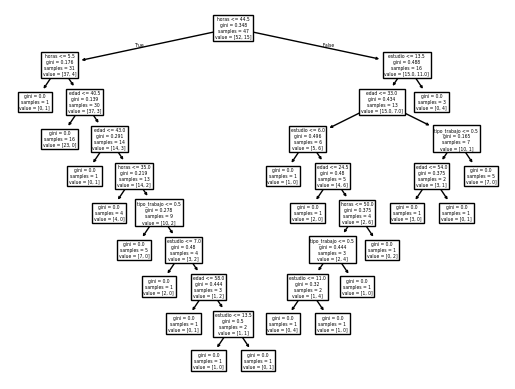

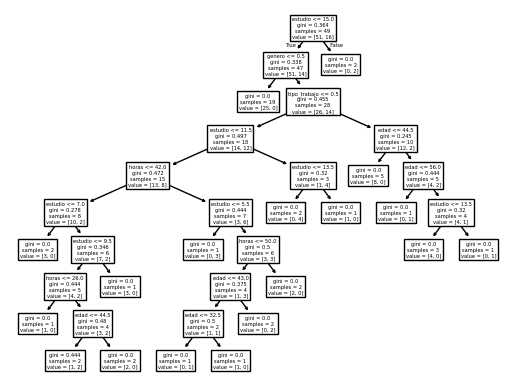

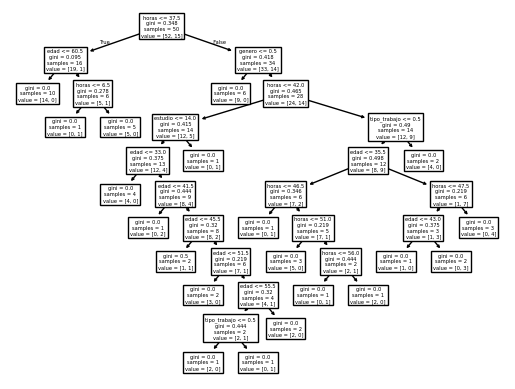

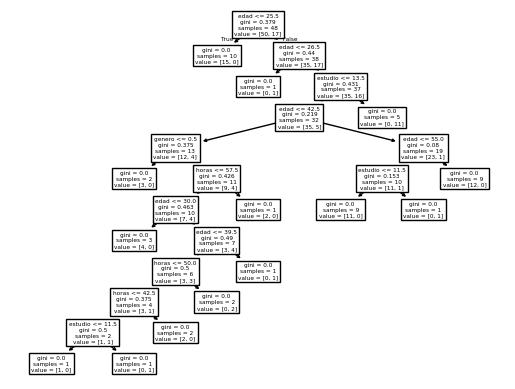

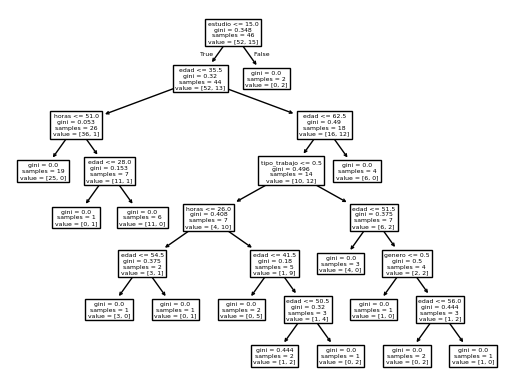

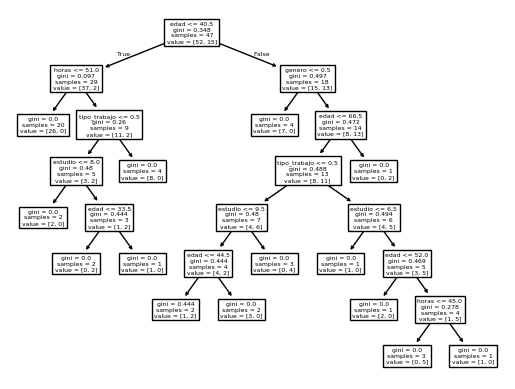

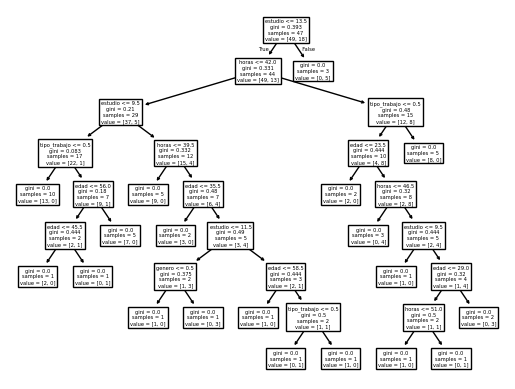

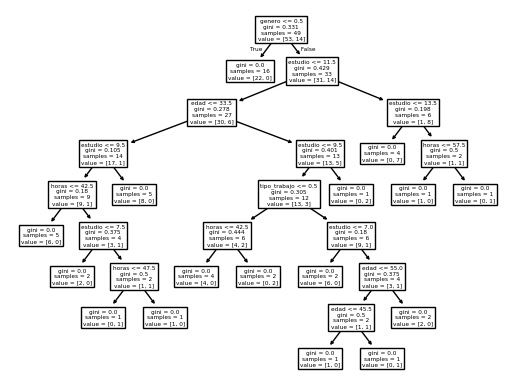

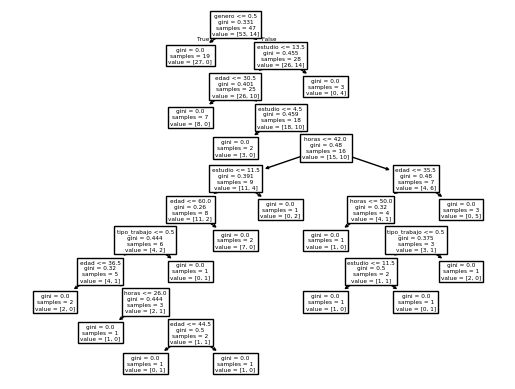

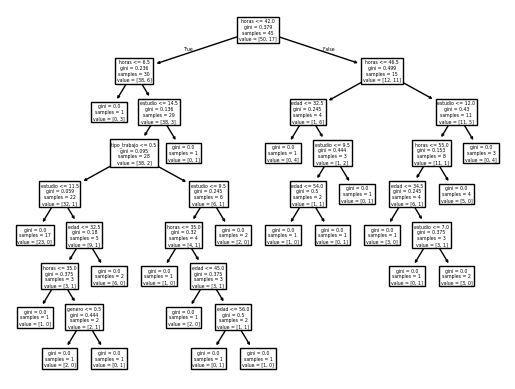

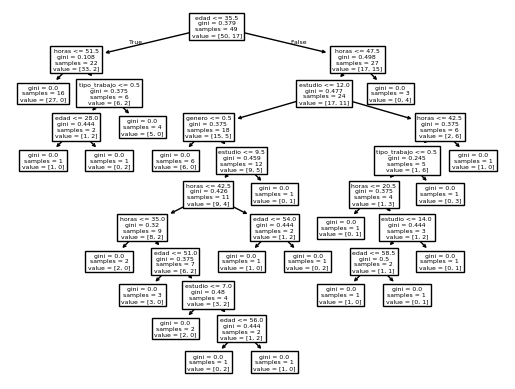

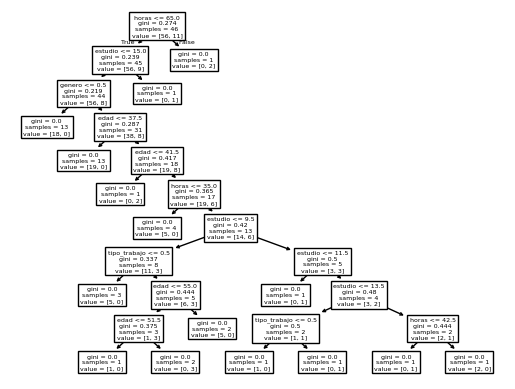

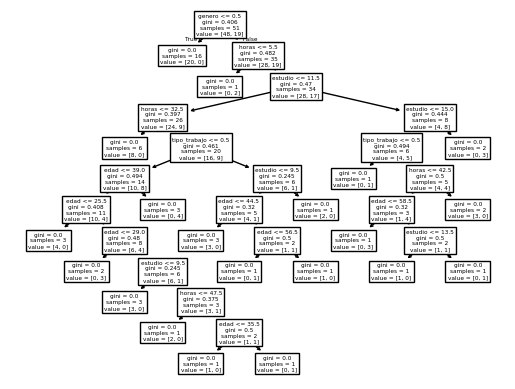

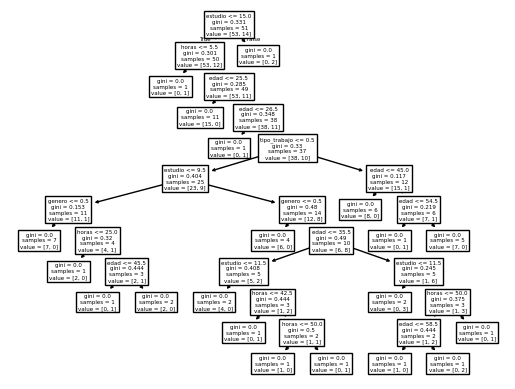

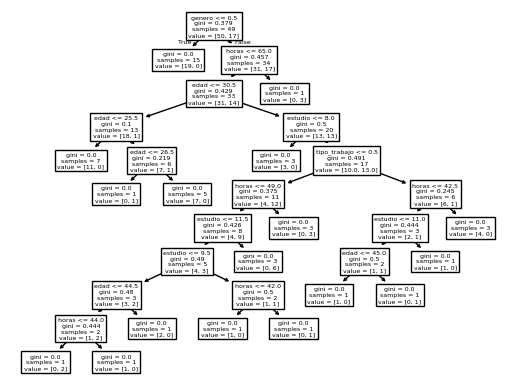

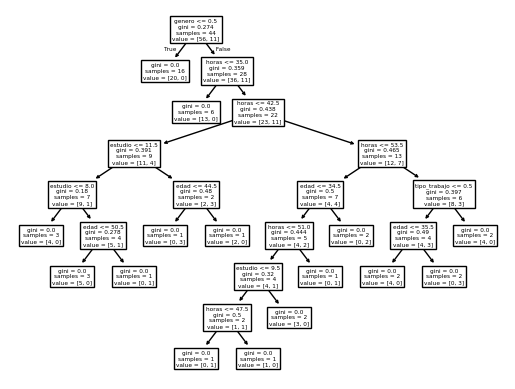

KeyboardInterrupt: 

In [48]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
    tree.plot_tree(arbol, feature_names=personas.columns[:-1])
    plt.show()